# I/ Connexion à la base de données SQL Server

In [3]:
import pandas as pd
import pyodbc
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Afficher les premières lignes du DataFrame
print(df.head())


           mca date_souscription_aff
0   476.899994            2022-10-05
1    13.440000            2022-10-05
2     7.440000            2022-10-05
3  1472.839966            2022-10-07
4    13.440000            2022-10-07


# II/ Data Viz

# II.1/ Faire La Somme Chiffre D'affaire (MCA) Pour une date de soucription spécifique

## II.1.1/ Nettoyage des données (Données Manquantes / Outliers)

In [4]:
import pandas as pd
import pyodbc

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Convertir la colonne 'date_souscription_aff' en datetime si ce n'est pas déjà le cas
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Supprimer les lignes en double basées sur la colonne 'date_souscription_aff'
df_unique_dates = df.drop_duplicates(subset=['date_souscription_aff'])

# Rétablir 'date_souscription_aff' en tant qu'index si nécessaire
df_unique_dates.set_index('date_souscription_aff', inplace=True)

# Afficher le DataFrame avec des dates uniques
print(df_unique_dates)


                               mca
date_souscription_aff             
2022-10-05              476.899994
2022-10-07             1472.839966
2022-10-11             1545.619995
2022-10-12              997.239990
2022-10-13              813.900024
...                            ...
2024-01-12              894.229980
2024-01-15              238.919998
2024-01-16              815.770020
2024-01-17              820.580017
2024-01-18              752.049988

[362 rows x 1 columns]


In [5]:
import pandas as pd
import pyodbc

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Convertir la colonne 'date_souscription_aff' en datetime si ce n'est pas déjà le cas
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Supprimer les lignes en double basées sur la colonne 'date_souscription_aff'
df_unique_dates = df.drop_duplicates(subset=['date_souscription_aff'])

# Afficher le DataFrame avec des dates uniques
df_unique_dates


,mca,date_souscription_aff
0,476.899994,2022-10-05
3,1472.839966,2022-10-07
6,1545.619995,2022-10-11
12,997.239990,2022-10-12
15,813.900024,2022-10-13
...,...,...
28998,894.229980,2024-01-12
29354,238.919998,2024-01-15
29480,815.770020,2024-01-16
29713,820.580017,2024-01-17


In [6]:
import pandas as pd
import pyodbc
from datetime import datetime

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Vérifier les valeurs manquantes
missing_values = df[['mca', 'date_souscription_aff']].isnull().sum()

# Afficher le nombre de valeurs manquantes
print("Nombre de valeurs manquantes pour la colonne 'mca':", missing_values['mca'])
print("Nombre de valeurs manquantes pour la colonne 'date_souscription_aff':", missing_values['date_souscription_aff'])

# Identifier les outliers dans la colonne 'mca' en utilisant la méthode IQR
Q1 = df['mca'].quantile(0.25)
Q3 = df['mca'].quantile(0.75)
IQR = Q3 - Q1
outliers_mca = df[(df['mca'] < (Q1 - 1.5 * IQR)) | (df['mca'] > (Q3 + 1.5 * IQR))]

# Convertir les chaînes de caractères en objets datetime.date
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Identifier les outliers dans la colonne 'date_souscription_aff' (nous supposerons qu'il s'agit de valeurs aberrantes si elles sont antérieures à 2000 ou postérieures à 2050)
outliers_date = df[(df['date_souscription_aff'] < datetime(2000, 1, 1)) | (df['date_souscription_aff'] > datetime(2050, 12, 31))]

# Afficher les outliers
print("Nombre d'outliers pour la colonne 'mca':", len(outliers_mca))
print("Nombre d'outliers pour la colonne 'date_souscription_aff':", len(outliers_date))


Nombre de valeurs manquantes pour la colonne 'mca': 32
Nombre de valeurs manquantes pour la colonne 'date_souscription_aff': 222
Nombre d'outliers pour la colonne 'mca': 2121
Nombre d'outliers pour la colonne 'date_souscription_aff': 0


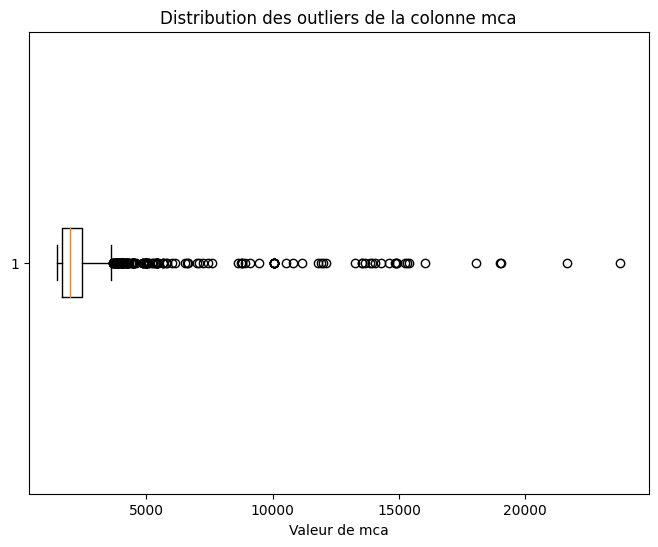

In [7]:
import matplotlib.pyplot as plt

# Créer un graphique de boîte à moustaches pour les outliers de la colonne 'mca'
plt.figure(figsize=(8, 6))
plt.boxplot(outliers_mca['mca'], vert=False)
plt.xlabel('Valeur de mca')
plt.title('Distribution des outliers de la colonne mca')
plt.show()


In [8]:
print(df_unique_dates.columns)

Index(['mca', 'date_souscription_aff'], dtype='object')


In [9]:
# Convertir la colonne 'date_souscription_aff' en type datetime
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mca_par_date = df.groupby('date_souscription_aff')['mca'].sum()

# Afficher les sommes de MCA par date
print(somme_mca_par_date)


date_souscription_aff
2022-10-05      497.779994
2022-10-07     1493.719965
2022-10-11     2016.779988
2022-10-12     1018.119990
2022-10-13      834.780024
                  ...     
2024-01-12    91653.560050
2024-01-15    65127.729650
2024-01-16    89811.999928
2024-01-17    98449.559476
2024-01-18    87867.149389
Name: mca, Length: 361, dtype: float64


In [10]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes mca et date_souscription_aff
df_cleaned = df.dropna(subset=['mca', 'date_souscription_aff'])

# Vérifier le nombre de lignes restantes
print("Nombre de lignes après suppression des valeurs manquantes:", len(df_cleaned))


Nombre de lignes après suppression des valeurs manquantes: 29935


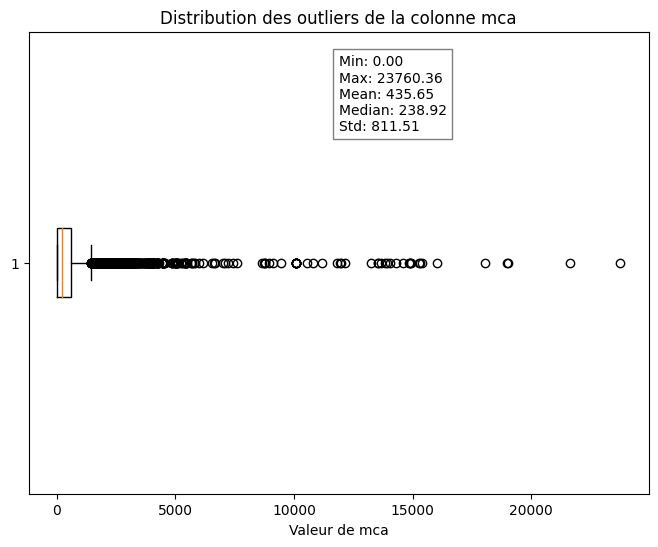

In [11]:
import matplotlib.pyplot as plt

# Calculer les statistiques descriptives
statistics = df_cleaned['mca'].describe()

# Créer un graphique de boîte à moustaches pour les valeurs aberrantes de la colonne 'mca'
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['mca'], vert=False)
plt.xlabel('Valeur de mca')
plt.title('Distribution des outliers de la colonne mca')

# Ajouter les statistiques descriptives
plt.text(0.5, 0.95, f'Min: {statistics["min"]:.2f}\nMax: {statistics["max"]:.2f}\nMean: {statistics["mean"]:.2f}\nMedian: {statistics["50%"]:.2f}\nStd: {statistics["std"]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [12]:
# Calculer les statistiques descriptives
statistics = df_cleaned['mca'].describe()

# Afficher les statistiques descriptives
print(f'Min: {statistics["min"]:.2f}\nMax: {statistics["max"]:.2f}\nMean: {statistics["mean"]:.2f}\nMedian: {statistics["50%"]:.2f}\nStd: {statistics["std"]:.2f}')


Min: 0.00
Max: 23760.36
Mean: 435.65
Median: 238.92
Std: 811.51


In [13]:
df_cleaned

,mca,date_souscription_aff
0,476.899994,2022-10-05
1,13.440000,2022-10-05
2,7.440000,2022-10-05
3,1472.839966,2022-10-07
4,13.440000,2022-10-07
...,...,...
30184,12.790000,2024-01-18
30185,8.560000,2024-01-18
30186,813.489990,2024-01-18
30187,12.790000,2024-01-18


In [14]:
# Convertir la colonne 'date_souscription_aff' en type datetime
df_cleaned['date_souscription_aff'] = pd.to_datetime(df_cleaned['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mca_par_date = df_cleaned.groupby('date_souscription_aff')['mca'].sum()

# Afficher les sommes de MCA par date
print(somme_mca_par_date)


date_souscription_aff
2022-10-05      497.779994
2022-10-07     1493.719965
2022-10-11     2016.779988
2022-10-12     1018.119990
2022-10-13      834.780024
                  ...     
2024-01-12    91653.560050
2024-01-15    65127.729650
2024-01-16    89811.999928
2024-01-17    98449.559476
2024-01-18    87867.149389
Name: mca, Length: 361, dtype: float64


In [15]:
# Convertir la colonne 'date_souscription_aff' en type datetime
df_cleaned['date_souscription_aff'] = pd.to_datetime(df_cleaned['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mca_par_date = df_cleaned.groupby('date_souscription_aff')['mca'].sum()

# Renommer la série contenant la somme de MCA par date
somme_mca_par_date.name = 'somme_mca'

# Afficher les sommes de MCA par date
print(somme_mca_par_date)


date_souscription_aff
2022-10-05      497.779994
2022-10-07     1493.719965
2022-10-11     2016.779988
2022-10-12     1018.119990
2022-10-13      834.780024
                  ...     
2024-01-12    91653.560050
2024-01-15    65127.729650
2024-01-16    89811.999928
2024-01-17    98449.559476
2024-01-18    87867.149389
Name: somme_mca, Length: 361, dtype: float64


In [16]:
# Convertir la série en DataFrame
somme_mca_df = somme_mca_par_date.reset_index()

# Afficher le DataFrame avec le nom de colonne spécifié
somme_mca_df


,date_souscription_aff,somme_mca
0,2022-10-05,497.779994
1,2022-10-07,1493.719965
2,2022-10-11,2016.779988
3,2022-10-12,1018.119990
4,2022-10-13,834.780024
...,...,...
356,2024-01-12,91653.560050
357,2024-01-15,65127.729650
358,2024-01-16,89811.999928
359,2024-01-17,98449.559476


In [17]:
nombre_lignes = somme_mca_df.shape[0]
print("Nombre de lignes dans le DataFrame somme_mca_par_date :", nombre_lignes)


Nombre de lignes dans le DataFrame somme_mca_par_date : 361


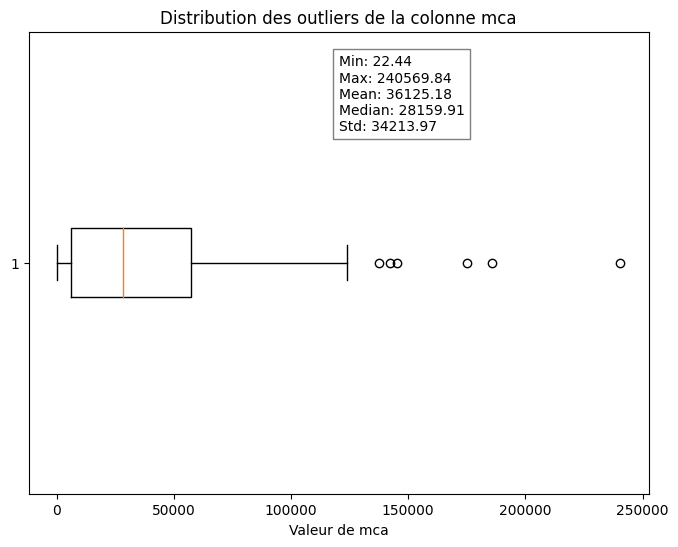

In [18]:
import matplotlib.pyplot as plt

# Calculer les statistiques descriptives
statistics = somme_mca_df['somme_mca'].describe()

# Créer un graphique de boîte à moustaches pour les valeurs aberrantes de la colonne 'mca'
plt.figure(figsize=(8, 6))
plt.boxplot(somme_mca_df['somme_mca'], vert=False)
plt.xlabel('Valeur de mca')
plt.title('Distribution des outliers de la colonne mca')

# Ajouter les statistiques descriptives
plt.text(0.5, 0.95, f'Min: {statistics["min"]:.2f}\nMax: {statistics["max"]:.2f}\nMean: {statistics["mean"]:.2f}\nMedian: {statistics["50%"]:.2f}\nStd: {statistics["std"]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [19]:
# Vérifier le nombre de valeurs manquantes
nombre_valeurs_manquantes = somme_mca_df['somme_mca'].isnull().sum()

# Vérifier le nombre de valeurs aberrantes (valeurs en dehors de 1,5 * IQR)
Q1 = somme_mca_df['somme_mca'].quantile(0.25)
Q3 = somme_mca_df['somme_mca'].quantile(0.75)
IQR = Q3 - Q1
valeurs_aberrantes = ((somme_mca_df['somme_mca'] < (Q1 - 1.5 * IQR)) | (somme_mca_df['somme_mca'] > (Q3 + 1.5 * IQR))).sum()

# Afficher le nombre de valeurs manquantes et aberrantes
print(f"Nombre de valeurs manquantes : {nombre_valeurs_manquantes}")
print(f"Nombre de valeurs aberrantes : {valeurs_aberrantes}")


Nombre de valeurs manquantes : 0
Nombre de valeurs aberrantes : 6


# Elimination des valeures aberrantes

In [21]:
# Créer une copie du dataframe
somme_mca_df_cleaned = somme_mca_df.copy()

# Filtrer les lignes aberrantes
Q1 = somme_mca_df_cleaned['somme_mca'].quantile(0.25)
Q3 = somme_mca_df_cleaned['somme_mca'].quantile(0.75)
IQR = Q3 - Q1
somme_mca_df_cleaned = somme_mca_df_cleaned[(somme_mca_df_cleaned['somme_mca'] >= (Q1 - 1.5 * IQR)) & (somme_mca_df_cleaned['somme_mca'] <= (Q3 + 1.5 * IQR))]

# Vérifier le nombre de valeurs manquantes et aberrantes dans le dataframe nettoyé
nombre_valeurs_manquantes_apres_nettoyage = somme_mca_df_cleaned['somme_mca'].isnull().sum()
valeurs_aberrantes_apres_nettoyage = ((somme_mca_df_cleaned['somme_mca'] < (Q1 - 1.5 * IQR)) | (somme_mca_df_cleaned['somme_mca'] > (Q3 + 1.5 * IQR))).sum()

# Afficher le nombre de valeurs manquantes et aberrantes après nettoyage
print(f"Nombre de valeurs manquantes après nettoyage : {nombre_valeurs_manquantes_apres_nettoyage}")
print(f"Nombre de valeurs aberrantes après nettoyage : {valeurs_aberrantes_apres_nettoyage}")


Nombre de valeurs manquantes après nettoyage : 0
Nombre de valeurs aberrantes après nettoyage : 0


In [22]:
somme_mca_df_cleaned

,date_souscription_aff,somme_mca
0,2022-10-05,497.779994
1,2022-10-07,1493.719965
2,2022-10-11,2016.779988
3,2022-10-12,1018.119990
4,2022-10-13,834.780024
...,...,...
356,2024-01-12,91653.560050
357,2024-01-15,65127.729650
358,2024-01-16,89811.999928
359,2024-01-17,98449.559476


# II.2/ Faire La Somme Chiffre D'affaire (MCM) Pour une date de soucription spécifique

                               mca
date_souscription_aff             
2022-10-05              476.899994
2022-10-07             1472.839966
2022-10-11             1545.619995
2022-10-12              997.239990
2022-10-13              813.900024
...                            ...
2024-01-12              894.229980
2024-01-15              238.919998
2024-01-16              815.770020
2024-01-17              820.580017
2024-01-18              752.049988

[362 rows x 1 columns]
Nombre de valeurs manquantes pour la colonne 'mcm': 225
Nombre de valeurs manquantes pour la colonne 'date_souscription_aff': 222
Nombre d'outliers pour la colonne 'mcm': 2035
Nombre d'outliers pour la colonne 'date_souscription_aff': 0


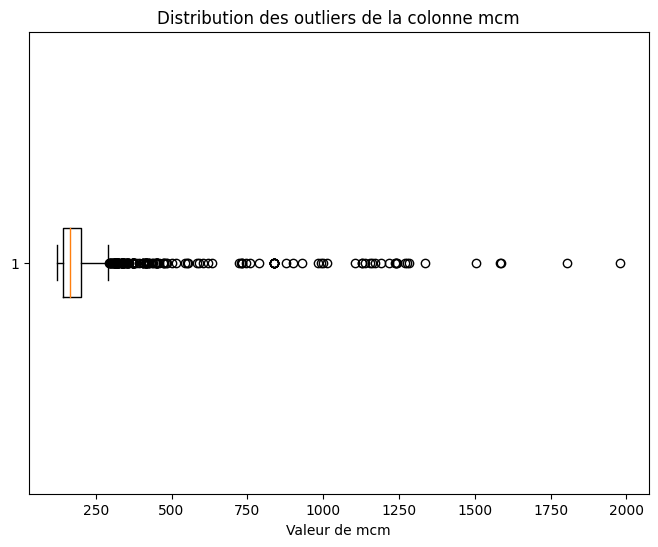

Index(['mca', 'date_souscription_aff'], dtype='object')
date_souscription_aff
2022-10-05      38.539999
2022-10-07     117.360003
2022-10-11     158.189999
2022-10-12      80.680002
2022-10-13      65.390002
                 ...     
2024-01-12    7695.570009
2024-01-15    5472.099966
2024-01-16    7478.780073
2024-01-17    8192.670058
2024-01-18    7267.200003
Name: mcm, Length: 361, dtype: float64


In [23]:
import pandas as pd
import pyodbc

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Convertir la colonne 'date_souscription_aff' en datetime si ce n'est pas déjà le cas
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Supprimer les lignes en double basées sur la colonne 'date_souscription_aff'
df_unique_dates = df.drop_duplicates(subset=['date_souscription_aff'])

# Rétablir 'date_souscription_aff' en tant qu'index si nécessaire
df_unique_dates.set_index('date_souscription_aff', inplace=True)

# Afficher le DataFrame avec des dates uniques
print(df_unique_dates)
import pandas as pd
import pyodbc

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mca, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Convertir la colonne 'date_souscription_aff' en datetime si ce n'est pas déjà le cas
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Supprimer les lignes en double basées sur la colonne 'date_souscription_aff'
df_unique_dates = df.drop_duplicates(subset=['date_souscription_aff'])

# Afficher le DataFrame avec des dates uniques
df_unique_dates
import pandas as pd
import pyodbc
from datetime import datetime

# Connexion à la base de données SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GQR709G\SQLEXPRESS;'
    'DATABASE=PFE_DWH;'
    'UID=sa;'
    'PWD=213GGMT7258;'
)

# Récupérer les données de la table Fact_Affaire
query = "SELECT mcm, date_souscription_aff FROM dbo.Fact_Affaire;"
df = pd.read_sql(query, conn)

# Vérifier les valeurs manquantes
missing_values = df[['mcm', 'date_souscription_aff']].isnull().sum()

# Afficher le nombre de valeurs manquantes
print("Nombre de valeurs manquantes pour la colonne 'mcm':", missing_values['mcm'])
print("Nombre de valeurs manquantes pour la colonne 'date_souscription_aff':", missing_values['date_souscription_aff'])

# Identifier les outliers dans la colonne 'mca' en utilisant la méthode IQR
Q1 = df['mcm'].quantile(0.25)
Q3 = df['mcm'].quantile(0.75)
IQR = Q3 - Q1
outliers_mcm = df[(df['mcm'] < (Q1 - 1.5 * IQR)) | (df['mcm'] > (Q3 + 1.5 * IQR))]

# Convertir les chaînes de caractères en objets datetime.date
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Identifier les outliers dans la colonne 'date_souscription_aff' (nous supposerons qu'il s'agit de valeurs aberrantes si elles sont antérieures à 2000 ou postérieures à 2050)
outliers_date = df[(df['date_souscription_aff'] < datetime(2000, 1, 1)) | (df['date_souscription_aff'] > datetime(2050, 12, 31))]

# Afficher les outliers
print("Nombre d'outliers pour la colonne 'mcm':", len(outliers_mcm))
print("Nombre d'outliers pour la colonne 'date_souscription_aff':", len(outliers_date))
import matplotlib.pyplot as plt

# Créer un graphique de boîte à moustaches pour les outliers de la colonne 'mca'
plt.figure(figsize=(8, 6))
plt.boxplot(outliers_mcm['mcm'], vert=False)
plt.xlabel('Valeur de mcm')
plt.title('Distribution des outliers de la colonne mcm')
plt.show()
print(df_unique_dates.columns)


# Convertir la colonne 'date_souscription_aff' en type datetime
df['date_souscription_aff'] = pd.to_datetime(df['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mcm_par_date = df.groupby('date_souscription_aff')['mcm'].sum()

# Afficher les sommes de MCA par date
print(somme_mcm_par_date)

# Supprimer les lignes avec des valeurs manquantes dans les colonnes mca et date_souscription_aff
df_cleaned_mcm = df.dropna(subset=['mcm', 'date_souscription_aff'])






In [24]:
# Vérifier le nombre de lignes restantes
print("Nombre de lignes après suppression des valeurs manquantes:", len(df_cleaned_mcm))
import matplotlib.pyplot as plt

# Calculer les statistiques descriptives
statistics = df_cleaned_mcm['mcm'].describe()





Nombre de lignes après suppression des valeurs manquantes: 29742


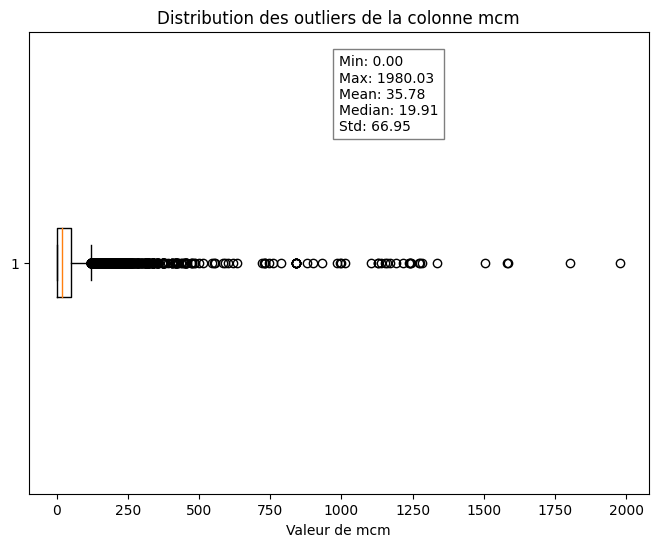

In [25]:
# Créer un graphique de boîte à moustaches pour les valeurs aberrantes de la colonne 'mcm
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned_mcm['mcm'], vert=False)
plt.xlabel('Valeur de mcm')
plt.title('Distribution des outliers de la colonne mcm')

# Ajouter les statistiques descriptives
plt.text(0.5, 0.95, f'Min: {statistics["min"]:.2f}\nMax: {statistics["max"]:.2f}\nMean: {statistics["mean"]:.2f}\nMedian: {statistics["50%"]:.2f}\nStd: {statistics["std"]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()
# Calculer les statistiques descriptives
statistics = df_cleaned_mcm['mcm'].describe()

In [26]:
# Afficher les statistiques descriptives
print(f'Min: {statistics["min"]:.2f}\nMax: {statistics["max"]:.2f}\nMean: {statistics["mean"]:.2f}\nMedian: {statistics["50%"]:.2f}\nStd: {statistics["std"]:.2f}')
df_cleaned_mcm
# Convertir la colonne 'date_souscription_aff' en type datetime
df_cleaned_mcm['date_souscription_aff'] = pd.to_datetime(df_cleaned_mcm['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mcm_par_date = df_cleaned_mcm.groupby('date_souscription_aff')['mcm'].sum()

# Afficher les sommes de MCA par date
print(somme_mcm_par_date)
# Convertir la colonne 'date_souscription_aff' en type datetime
df_cleaned_mcm['date_souscription_aff'] = pd.to_datetime(df_cleaned_mcm['date_souscription_aff'])

# Grouper les données par date de souscription et calculer la somme de MCA pour chaque date
somme_mcm_par_date = df_cleaned_mcm.groupby('date_souscription_aff')['mcm'].sum()

# Renommer la série contenant la somme de MCA par date
somme_mca_par_date.name = 'somme_mcm'

# Afficher les sommes de MCA par date
print(somme_mcm_par_date)
# Convertir la série en DataFrame
somme_mcm_df = somme_mcm_par_date.reset_index()

# Afficher le DataFrame avec le nom de colonne spécifié
somme_mcm_df



Min: 0.00
Max: 1980.03
Mean: 35.78
Median: 19.91
Std: 66.95
date_souscription_aff
2022-10-05      38.539999
2022-10-07     117.360003
2022-10-11     158.189999
2022-10-12      80.680002
2022-10-13      65.390002
                 ...     
2024-01-12    7695.570009
2024-01-15    5472.099966
2024-01-16    7478.780073
2024-01-17    8192.670058
2024-01-18    7267.200003
Name: mcm, Length: 359, dtype: float64
date_souscription_aff
2022-10-05      38.539999
2022-10-07     117.360003
2022-10-11     158.189999
2022-10-12      80.680002
2022-10-13      65.390002
                 ...     
2024-01-12    7695.570009
2024-01-15    5472.099966
2024-01-16    7478.780073
2024-01-17    8192.670058
2024-01-18    7267.200003
Name: mcm, Length: 359, dtype: float64


,date_souscription_aff,mcm
0,2022-10-05,38.539999
1,2022-10-07,117.360003
2,2022-10-11,158.189999
3,2022-10-12,80.680002
4,2022-10-13,65.390002
...,...,...
354,2024-01-12,7695.570009
355,2024-01-15,5472.099966
356,2024-01-16,7478.780073
357,2024-01-17,8192.670058


In [27]:
somme_mcm_df

,date_souscription_aff,mcm
0,2022-10-05,38.539999
1,2022-10-07,117.360003
2,2022-10-11,158.189999
3,2022-10-12,80.680002
4,2022-10-13,65.390002
...,...,...
354,2024-01-12,7695.570009
355,2024-01-15,5472.099966
356,2024-01-16,7478.780073
357,2024-01-17,8192.670058


# II. Prédiction du Chiffre d'affaire par date et gamme

# II.1(Random Forest)

In [201]:
# Charger le DataFrame
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date'] = df_gamme_ca_affg['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = df_gamme_ca_affg[['Date', 'nom_gamme_prod']]
y = df_gamme_ca_affg['mca']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['nom_gamme_prod'])


# Diviser les données en ensembles d'entraînement, de test et de validation (70% train, 20% test, 10% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  

# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()


# Appliquer la normalisation sur y_train, y_test et y_val
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler.transform(y_val.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)
y_val_pred_scaled = model.predict(X_val)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
r2_val_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mae_val_scaled = mean_absolute_error(y_val_scaled, y_val_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)
mse_val_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)


# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")
print(f"Validation: {r2_val_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")
print(f"Validation: {mae_val_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")
print(f"Validation: {mse_val_scaled}")


R² scores (scaled):
Train: 0.9914562201054593
Test: 0.8679485646588072
Validation: 0.8926009963424478

Mean Absolute Errors (scaled):
Train: 0.009497080410842748
Test: 0.03410272269137106
Validation: 0.005956335575139364

Mean Squared Errors (scaled):
Train: 0.0003538643702054591
Test: 0.007864253247042211
Validation: 0.00019878834240235003


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger le DataFrame
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date'] = df_gamme_ca_affg['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = df_gamme_ca_affg[['Date', 'nom_gamme_prod']]
y = df_gamme_ca_affg['mca']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['nom_gamme_prod'])

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.9914562201054593
Test: 0.8760222548159475

Mean Absolute Errors (scaled):
Train: 0.009497080410842748
Test: 0.024720593652627163

Mean Squared Errors (scaled):
Train: 0.0003538643702054591
Test: 0.005309098278828924


In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Charger les données
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')
df_gamme_ca_affg

,mca,nom_gamme_prod,mcm,annee,mois,Jour,Date
0,785.23,FULL SANTE TNS,61.700001,2022,10,1,2022-10-01
1,21477.24,FULL SANTE,1703.740002,2022,10,7,2022-10-07
2,163.68,AS-Sante protection juridique,13.640000,2022,10,7,2022-10-07
3,295.68,AS sante Assistance,24.640000,2022,10,29,2022-10-29
4,591.36,AS sante Assistance,16.800000,2022,11,2,2022-11-02
...,...,...,...,...,...,...,...
115,2236.81,PRÉVOIR Prévoyance,186.400000,2024,1,17,2024-01-17
116,35337.32,FULL SANTE TNS,2944.760044,2024,1,22,2024-01-22
117,172368.10,ALL SANTE,14431.030045,2024,1,22,2024-01-22
118,1109.28,Prévoyance MAA,92.440003,2024,1,24,2024-01-24


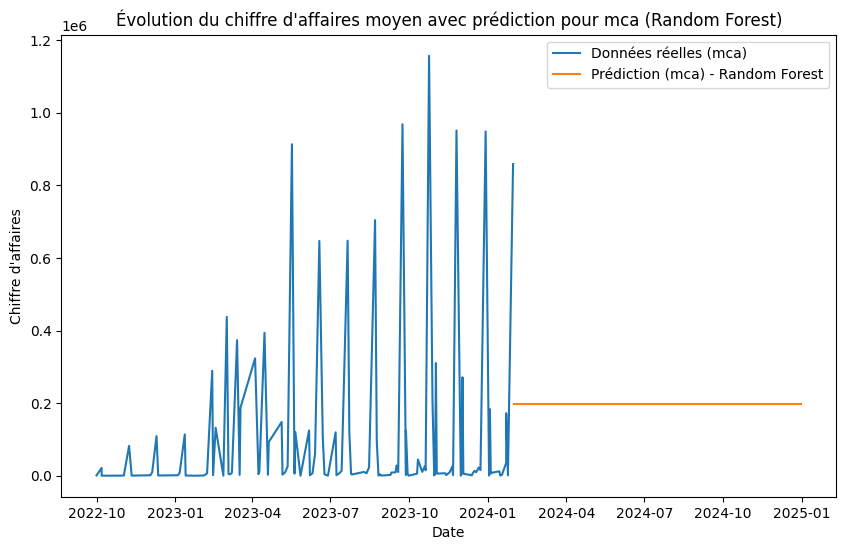

In [49]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date_numeric'] = (df_gamme_ca_affg['Date'] - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')

# Séparer les données en données d'entraînement et de test pour 'mca'
X_train_mca = df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31']['Date_numeric'].values.reshape(-1, 1)
y_train_mca = np.log1p(df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31']['mca'])

# Créer et entraîner le modèle Random Forest pour 'mca'
model_mca = RandomForestRegressor(random_state=42)
model_mca.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'mca'
future_dates = pd.date_range(start='2024-01-31', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'mca'
plt.figure(figsize=(10, 6))
plt.plot(df_gamme_ca_affg['Date'], df_gamme_ca_affg['mca'], label='Données réelles (mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (mca) - Random Forest')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires moyen avec prédiction pour mca (Random Forest)')
plt.legend()
plt.show()


# II.2 Regression Linéaire

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger le DataFrame
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date'] = df_gamme_ca_affg['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = df_gamme_ca_affg[['Date', 'nom_gamme_prod']]
y = df_gamme_ca_affg['mca']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['nom_gamme_prod'])

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.6576060695824735
Test: 0.7301415537277125

Mean Absolute Errors (scaled):
Train: 0.07604972721153021
Test: 0.07401984838776816

Mean Squared Errors (scaled):
Train: 0.0141811954480229
Test: 0.011556146714111565


In [68]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Créer un modèle de régression linéaire pour 'mca' (Chiffre d'affaires moyen)
model_mca = LinearRegression()

# Convertir la colonne 'Date' en un format compatible avec la régression linéaire
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date_numeric'] = (df_gamme_ca_affg['Date'] - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')


In [69]:
df_gamme_ca_affg['Date']

0     2022-10-01
1     2022-10-07
2     2022-10-07
3     2022-10-29
4     2022-11-02
         ...    
115   2024-01-17
116   2024-01-22
117   2024-01-22
118   2024-01-24
119   2024-01-30
Name: Date, Length: 120, dtype: datetime64[ns]

In [251]:
# Séparer les données en données d'entraînement et de test pour 'mca'
X_train_mca = df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31']['Date_numeric'].values.reshape(-1, 1)
y_train_mca = np.log1p(df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31']['mca'])


In [252]:
# Adapter le modèle aux données d'entraînement pour 'mca'
model_mca.fit(X_train_mca, y_train_mca)

LinearRegression()

In [256]:
# Prévoir les valeurs futures pour 'mca'
future_dates = pd.date_range(start='2024-01-31', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

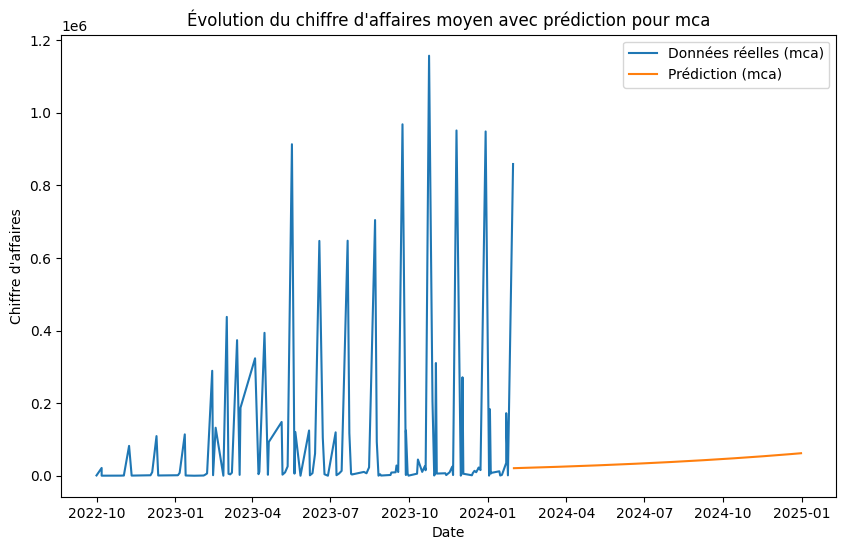

In [257]:
# Tracer les données réelles et les prédictions pour 'mca'
plt.figure(figsize=(10, 6))
plt.plot(df_gamme_ca_affg['Date'], df_gamme_ca_affg['mca'], label='Données réelles (mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (mca)')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires moyen avec prédiction pour mca')
plt.legend()
plt.show()

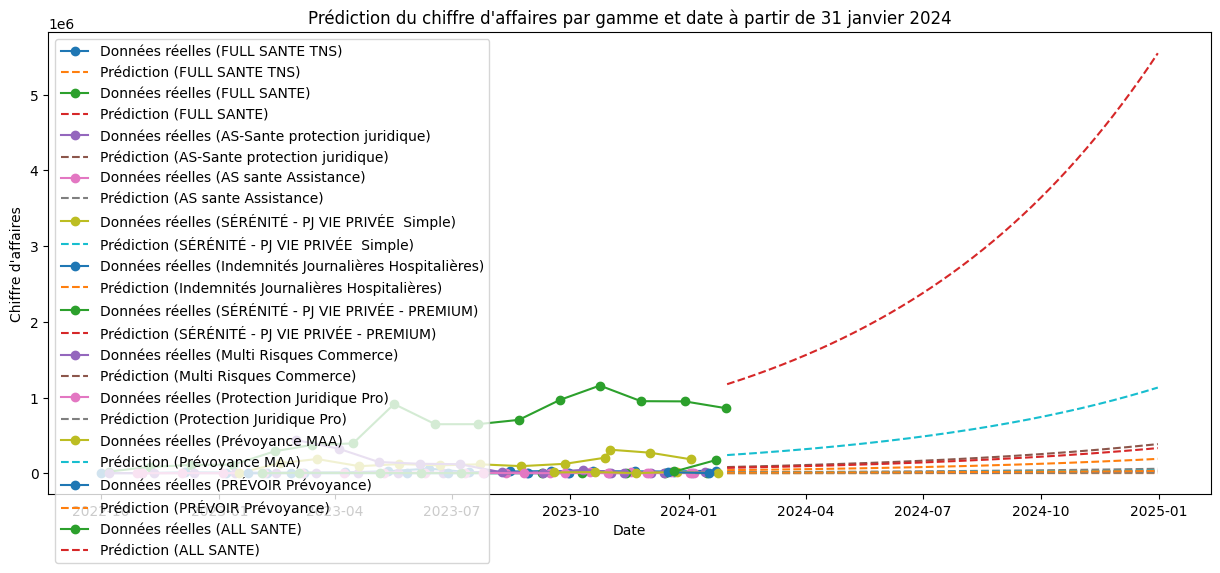

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Créer un modèle de régression linéaire pour 'mca' (Chiffre d'affaires moyen)
model_mca = LinearRegression()

# Convertir la colonne 'Date' en un format compatible avec la régression linéaire
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date_numeric'] = (df_gamme_ca_affg['Date'] - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')

# Séparer les données en données d'entraînement et de test pour 'mca'
X_train_mca = df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31'][['Date_numeric', 'nom_gamme_prod']]
X_train_mca = pd.get_dummies(X_train_mca, columns=['nom_gamme_prod'])
y_train_mca = np.log1p(df_gamme_ca_affg[df_gamme_ca_affg['Date'] < '2024-01-31']['mca'])

# Adapter le modèle aux données d'entraînement pour 'mca'
model_mca.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'mca'
future_dates = pd.date_range(start='2024-01-31', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - df_gamme_ca_affg['Date'].min()) / np.timedelta64(1, 'D')

# Créer un DataFrame pour les prédictions futures avec toutes les combinaisons de dates et de gammes de produits
future_data = pd.DataFrame({'Date_numeric': np.repeat(future_dates_numeric, len(df_gamme_ca_affg['nom_gamme_prod'].unique())),
                            'nom_gamme_prod': np.tile(df_gamme_ca_affg['nom_gamme_prod'].unique(), len(future_dates_numeric))})

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
future_data = pd.get_dummies(future_data, columns=['nom_gamme_prod'])

# Prévoir les chiffres d'affaires
future_predictions_log = model_mca.predict(future_data)
future_predictions = np.expm1(future_predictions_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'mca' par gamme de produit
plt.figure(figsize=(15, 6))
for gamme in df_gamme_ca_affg['nom_gamme_prod'].unique():
    plt.plot(df_gamme_ca_affg[df_gamme_ca_affg['nom_gamme_prod'] == gamme]['Date'],
             df_gamme_ca_affg[df_gamme_ca_affg['nom_gamme_prod'] == gamme]['mca'],
             label=f'Données réelles ({gamme})', linestyle='-', marker='o')
    plt.plot(future_dates,
             future_predictions[future_data['nom_gamme_prod_' + gamme] == 1],
             label=f'Prédiction ({gamme})', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Prédiction du chiffre d\'affaires par gamme et date à partir de 31 janvier 2024')
plt.legend()
plt.show()

# II.3 Regression Polynomiale

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Charger le DataFrame
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date'] = df_gamme_ca_affg['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = df_gamme_ca_affg[['Date', 'nom_gamme_prod']]
y = df_gamme_ca_affg['mca']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['nom_gamme_prod'])

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Créer et entraîner le modèle de régression polynomiale
poly = PolynomialFeatures(degree=2)  # Utiliser un degré de 2 pour la régression polynomiale
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train_scaled)

# Utiliser les données normalisées pour les prédictions
y_train_pred_scaled = model.predict(X_train_poly)
y_test_pred_scaled = model.predict(X_test_poly)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.9457240834903158
Test: 0.9026849384661982

Mean Absolute Errors (scaled):
Train: 0.023047542892620076
Test: 0.0239076464849035

Mean Squared Errors (scaled):
Train: 0.002247987805174612
Test: 0.004167322328101966


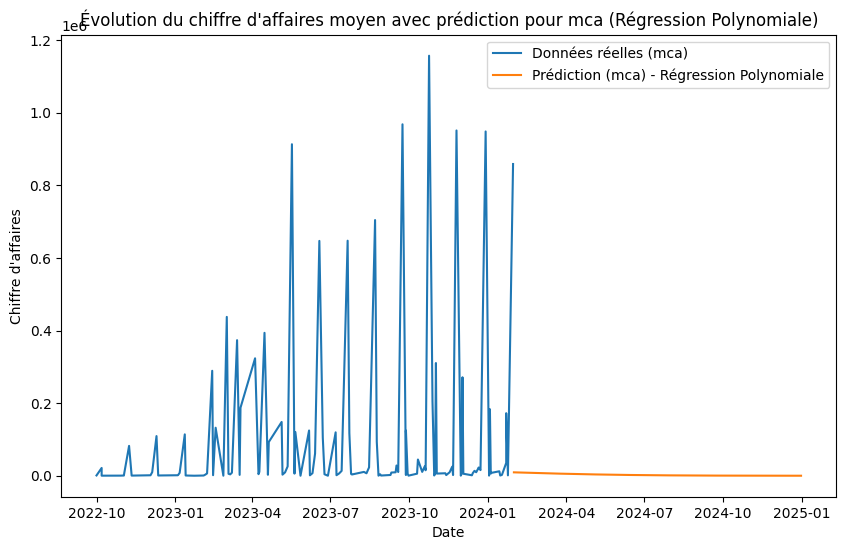

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Créer les caractéristiques polynomiales pour 'mca'
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_mca)

# Créer et entraîner le modèle de régression polynomiale pour 'mca'
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_mca)

# Prévoir les valeurs futures pour 'mca' avec la régression polynomiale
future_dates_poly = poly_features.transform(future_dates_numeric)
y_pred_mca_poly_log = model_poly.predict(future_dates_poly)
y_pred_mca_poly = np.expm1(y_pred_mca_poly_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'mca' avec la régression polynomiale
plt.figure(figsize=(10, 6))
plt.plot(df_gamme_ca_affg['Date'], df_gamme_ca_affg['mca'], label='Données réelles (mca)')
plt.plot(future_dates, y_pred_mca_poly, label='Prédiction (mca) - Régression Polynomiale')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires moyen avec prédiction pour mca (Régression Polynomiale)')
plt.legend()
plt.show()


# Gradient Boosting

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger le DataFrame
df_gamme_ca_affg = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/df_gamme_ca_affg.xls')

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
df_gamme_ca_affg['Date'] = pd.to_datetime(df_gamme_ca_affg['Date'])
df_gamme_ca_affg['Date'] = df_gamme_ca_affg['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = df_gamme_ca_affg[['Date', 'nom_gamme_prod']]
y = df_gamme_ca_affg['mca']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['nom_gamme_prod'])

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42) 

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.999205060439923
Test: 0.8239532293818647

Mean Absolute Errors (scaled):
Train: 0.0037927884516476677
Test: 0.03519239601045817

Mean Squared Errors (scaled):
Train: 3.2924629408797026e-05
Test: 0.007538849859663029


# II.4 Comparaison entre les modèles

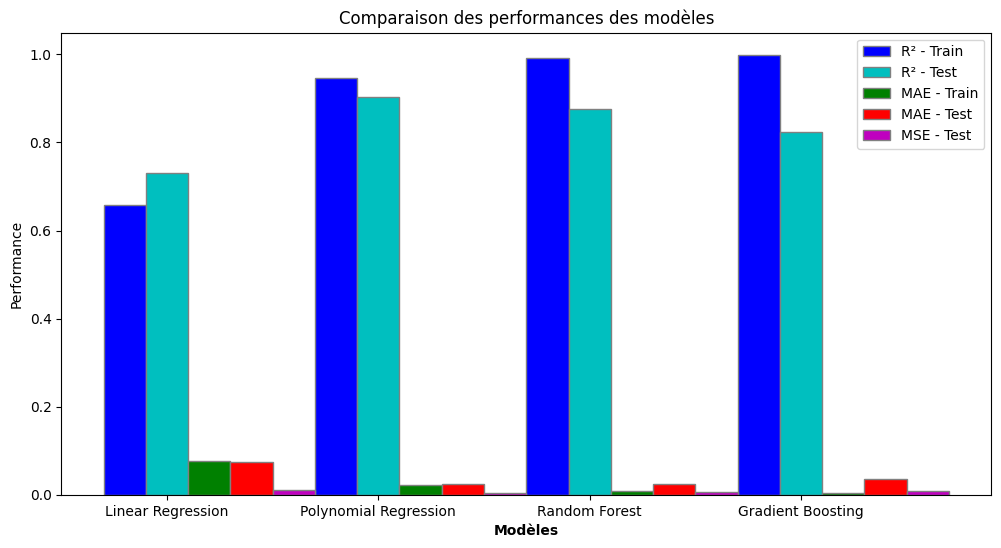

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Données des métriques pour chaque modèle
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest','Gradient Boosting']
r2_train = [0.6576060695824735, 0.9457240834903158, 0.9914562201054593,0.999205060439923]  
r2_test = [0.7301415537277125, 0.9026849384661982, 0.8760222548159475,0.8239532293818647]  
mae_train = [0.07604972721153021, 0.023047542892620076, 0.009497080410842748,0.0037927884516476677]  
mae_test = [0.07401984838776816, 0.0239076464849035, 0.024720593652627163,0.03519239601045817]  
mse_train = [0.0141811954480229, 0.002247987805174612, 0.0003538643702054591,3.2924629408797026e-05]  
mse_test = [0.011556146714111565, 0.004167322328101966, 0.005309098278828924,0.007538849859663029]  

# Créer un graphique à barres pour chaque métrique
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()


# III. Prédiction du Nombre d'affaire par date et gamme

# III.1 Prétraitement de données

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger le DataFrame
nb_aff_date_gamme = pd.read_csv('C:/Users/dell/Downloads/nb_aff_date_gamme.csv')

nb_aff_date_gamme

,Nom_Gamme_Produit,Nombre de Id_Affaire,Date
0,NaN,3,2023-10-10 00:00:00
1,ALL SANTE,1,NaN
2,ALL SANTE,11,2023-12-21 00:00:00
3,ALL SANTE,6,2023-12-22 00:00:00
4,ALL SANTE,1,2023-12-29 00:00:00
...,...,...,...
1640,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,76,2024-01-12 00:00:00
1641,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,44,2024-01-15 00:00:00
1642,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,41,2024-01-16 00:00:00
1643,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,49,2024-01-17 00:00:00


In [74]:
# Créer une copie du DataFrame
nb_aff_date_gamme_copie = nb_aff_date_gamme.copy()

# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'Nom_Gamme_Produit' et 'Date'
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.dropna(subset=['Nom_Gamme_Produit', 'Date'])

# Renommer la colonne 'Nombre de Id_Affaire' en 'Nombre_affaire'
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.rename(columns={'Nombre de Id_Affaire': 'Nombre_affaire'})

# Supprimer les heures, minutes et secondes des dates dans la colonne 'Date'
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date']).dt.date

# Afficher les premières lignes du DataFrame copié pour vérification
nb_aff_date_gamme_copie


,Nom_Gamme_Produit,Nombre_affaire,Date
2,ALL SANTE,11,2023-12-21
3,ALL SANTE,6,2023-12-22
4,ALL SANTE,1,2023-12-29
5,ALL SANTE,8,2024-01-02
6,ALL SANTE,17,2024-01-03
...,...,...,...
1640,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,76,2024-01-12
1641,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,44,2024-01-15
1642,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,41,2024-01-16
1643,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,49,2024-01-17


In [77]:
# Afficher le type de données de la colonne 'Date'
print(nb_aff_date_gamme_copie['Date'].dtypes)


object


In [78]:
# Convertir la colonne 'Date' en datetime64[ns]
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])


In [79]:
nb_aff_date_gamme_copie['Date']

2      2023-12-21
3      2023-12-22
4      2023-12-29
5      2024-01-02
6      2024-01-03
          ...    
1640   2024-01-12
1641   2024-01-15
1642   2024-01-16
1643   2024-01-17
1644   2024-01-18
Name: Date, Length: 1638, dtype: datetime64[ns]

In [75]:
# Créer une copie du DataFrame
nb_aff_date_gamme_copie = nb_aff_date_gamme.copy()

# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'Nom_Gamme_Produit' et 'Date'
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.dropna(subset=['Nom_Gamme_Produit', 'Date'])

# Renommer la colonne 'Nombre de Id_Affaire' en 'Nombre_affaire'
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.rename(columns={'Nombre de Id_Affaire': 'Nombre_affaire'})

# Supprimer les heures, minutes et secondes des dates dans la colonne 'Date'
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date']).dt.date

# Vérifier les valeurs manquantes après la suppression
missing_values_apres_suppression = nb_aff_date_gamme_copie[['Nom_Gamme_Produit', 'Nombre_affaire', 'Date']].isnull().sum()

# Afficher le nombre de valeurs manquantes après la suppression
print("Nombre de valeurs manquantes pour la colonne 'Nom_Gamme_Produit' après suppression:", missing_values_apres_suppression['Nom_Gamme_Produit'])
print("Nombre de valeurs manquantes pour la colonne 'Nombre_affaire' après suppression:", missing_values_apres_suppression['Nombre_affaire'])
print("Nombre de valeurs manquantes pour la colonne 'Date' après suppression:", missing_values_apres_suppression['Date'])


Nombre de valeurs manquantes pour la colonne 'Nom_Gamme_Produit' après suppression: 0
Nombre de valeurs manquantes pour la colonne 'Nombre_affaire' après suppression: 0
Nombre de valeurs manquantes pour la colonne 'Date' après suppression: 0


In [76]:
# Sauvegarder le DataFrame au format Excel en ignorant les avertissements
import warnings
warnings.filterwarnings("ignore")

nb_aff_date_gamme_copie.to_excel('nb_aff_date_gamme_copie.xls', index=False )

# Créer le lien de téléchargement vers le fichier Excel
from IPython.display import FileLink
FileLink('nb_aff_date_gamme_copie.xls')


C:\Users\dell\nb_aff_date_gamme_copie.xls

# III.1 Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd


nb_aff_date_gamme_copie


#Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])
nb_aff_date_gamme_copie['Date'] = nb_aff_date_gamme_copie['Date'].apply(lambda x: x.toordinal())


# Préparer les features d'entrée et la variable cible
X =nb_aff_date_gamme_copie[['Nom_Gamme_Produit','Date']]
y = nb_aff_date_gamme_copie['Nombre_affaire']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['Nom_Gamme_Produit'])
# Diviser les données en ensembles d'entraînement, de test et de validation (70% train, 20% test, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42) 
# Créer une instance du scaler MinMax
scaler = MinMaxScaler()
# Appliquer la normalisation sur y_train, y_test et y_val
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()
#Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)
# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)
# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.9484208117194345
Test: 0.7059199970697647

Mean Absolute Errors (scaled):
Train: 0.024091768470040728
Test: 0.05793172237277928

Mean Squared Errors (scaled):
Train: 0.0014634415839551661
Test: 0.008542307370604569


In [8]:
nb_aff_date_gamme

,Nom_Gamme_Produit,Nombre de Id_Affaire,Date
0,NaN,3,2023-10-10 00:00:00
1,ALL SANTE,1,NaN
2,ALL SANTE,11,2023-12-21 00:00:00
3,ALL SANTE,6,2023-12-22 00:00:00
4,ALL SANTE,1,2023-12-29 00:00:00
...,...,...,...
1640,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,76,2024-01-12 00:00:00
1641,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,44,2024-01-15 00:00:00
1642,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,41,2024-01-16 00:00:00
1643,SÉRÉNITÉ - PJ VIE PRIVÉE Simple,49,2024-01-17 00:00:00


# III.1 Regression Linéaire 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd


nb_aff_date_gamme_copie


#Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])
nb_aff_date_gamme_copie['Date'] = nb_aff_date_gamme_copie['Date'].apply(lambda x: x.toordinal())


# Préparer les features d'entrée et la variable cible
X =nb_aff_date_gamme_copie[['Nom_Gamme_Produit','Date']]
y = nb_aff_date_gamme_copie['Nombre_affaire']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['Nom_Gamme_Produit'])
# Diviser les données en ensembles d'entraînement, de test et de validation (70% train, 20% test, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Créer et entraîner le modèle
model = LinearRegression()
# Créer une instance du scaler MinMax
scaler = MinMaxScaler()
# Appliquer la normalisation sur y_train, y_test et y_val
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()
#Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)
# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)
# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.44409414553383086
Test: 0.49066275267846526

Mean Absolute Errors (scaled):
Train: 0.0897099204500341
Test: 0.0860266541345645

Mean Squared Errors (scaled):
Train: 0.015772558105503424
Test: 0.014795005707852762


# III.1 Regression Polynomiale 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

nb_aff_date_gamme_copie

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])
nb_aff_date_gamme_copie['Date'] = nb_aff_date_gamme_copie['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = nb_aff_date_gamme_copie[['Nom_Gamme_Produit', 'Date']]
y = nb_aff_date_gamme_copie['Nombre_affaire']

# Effectuer l'encodage one-hot sur la colonne 'Nom_Gamme_Produit'
X = pd.get_dummies(X, columns=['Nom_Gamme_Produit'])

# Diviser les données en ensembles d'entraînement, de test et de validation (70% train, 20% test, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer une instance du scaler MinMax pour normaliser y
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Créer et entraîner le modèle de régression polynomiale
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_scaled)

# Prédire les valeurs pour les données d'entraînement et de test
y_train_pred_scaled = model_poly.predict(X_train_poly)
y_test_pred_scaled = model_poly.predict(X_test_poly)

# Calculer les scores R², MAE et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation pour le modèle polynomial
print("Polynomial Regression R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nPolynomial Regression Mean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nPolynomial Regression Mean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


Polynomial Regression R² scores (scaled):
Train: 0.474752803748945
Test: 0.5290957203808564

Polynomial Regression Mean Absolute Errors (scaled):
Train: 0.08116821288335999
Test: 0.07566005139305475

Polynomial Regression Mean Squared Errors (scaled):
Train: 0.014902688748579633
Test: 0.013678621662670924


## Gradient Boosting

In [5]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
import pandas as pd 
# Charger le DataFrame 
nb_aff_date_gamme = pd.read_csv('C:/Users/dell/Downloads/nb_aff_date_gamme.csv') 
nb_aff_date_gamme

# Créer une copie du DataFrame 
nb_aff_date_gamme_copie = nb_aff_date_gamme.copy() 
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'Nom_Gamme_Produit' et 'Date' 
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.dropna(subset=['Nom_Gamme_Produit', 'Date']) 
# Renommer la colonne 'Nombre de Id_Affaire' en 'Nombre_affaire' 
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.rename(columns={'Nombre de Id_Affaire': 'Nombre_affaire'}) 
# Supprimer les heures, minutes et secondes des dates dans la colonne 'Date' 
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date']).dt.date 
# Afficher les premières lignes du DataFrame copié pour vérification 
nb_aff_date_gamme_copie
# Afficher le type de données de la colonne 'Date' 
print(nb_aff_date_gamme_copie['Date'].dtypes)

# Convertir la colonne 'Date' en datetime64[ns] 
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])

nb_aff_date_gamme_copie['Date']
# Créer une copie du DataFrame 
nb_aff_date_gamme_copie = nb_aff_date_gamme.copy() 
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'Nom_Gamme_Produit' et 'Date' 
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.dropna(subset=['Nom_Gamme_Produit', 'Date']) 
# Renommer la colonne 'Nombre de Id_Affaire' en 'Nombre_affaire'
nb_aff_date_gamme_copie = nb_aff_date_gamme_copie.rename(columns={'Nombre de Id_Affaire': 'Nombre_affaire'}) 
# Supprimer les heures, minutes et secondes des dates dans la colonne 'Date' 
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date']).dt.date 
# Vérifier les valeurs manquantes après la suppression 
missing_values_apres_suppression = nb_aff_date_gamme_copie[['Nom_Gamme_Produit', 'Nombre_affaire', 'Date']].isnull().sum() 
# Afficher le nombre de valeurs manquantes après la suppression 
print("Nombre de valeurs manquantes pour la colonne 'Nom_Gamme_Produit' après suppression:", missing_values_apres_suppression['Nom_Gamme_Produit']) 
print("Nombre de valeurs manquantes pour la colonne 'Nombre_affaire' après suppression:", missing_values_apres_suppression['Nombre_affaire']) 
print("Nombre de valeurs manquantes pour la colonne 'Date' après suppression:", missing_values_apres_suppression['Date'])







object
Nombre de valeurs manquantes pour la colonne 'Nom_Gamme_Produit' après suppression: 0
Nombre de valeurs manquantes pour la colonne 'Nombre_affaire' après suppression: 0
Nombre de valeurs manquantes pour la colonne 'Date' après suppression: 0


In [16]:
from IPython.display import FileLink

# Sauvegarder le DataFrame au format Excel en ignorant les avertissements
import warnings
warnings.filterwarnings("ignore")
nb_aff_date_gamme_copie.to_excel('nb_aff_date_gamme_copie.xls', index=False)

# Créer le lien de téléchargement vers le fichier Excel
FileLink('nb_aff_date_gamme_copie.xls')


C:\Users\dell\nb_aff_date_gamme_copie.xls

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

nb_aff_date_gamme_copie

# Convertir la colonne 'Date' en un format compatible avec l'apprentissage automatique
nb_aff_date_gamme_copie['Date'] = pd.to_datetime(nb_aff_date_gamme_copie['Date'])
nb_aff_date_gamme_copie['Date'] = nb_aff_date_gamme_copie['Date'].apply(lambda x: x.toordinal())

# Préparer les features d'entrée et la variable cible
X = nb_aff_date_gamme_copie[['Nom_Gamme_Produit','Date']]
y = nb_aff_date_gamme_copie['Nombre_affaire']

# Effectuer l'encodage one-hot sur la colonne 'nom_gamme_prod'
X = pd.get_dummies(X, columns=['Nom_Gamme_Produit'])

# Diviser les données en ensembles d'entraînement, de test et de validation (70% train, 20% test, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Créer et entraîner le modèle GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42) 

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train, y_test et y_val
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores (scaled):
Train: 0.643944580398649
Test: 0.6415272740620215

Mean Absolute Errors (scaled):
Train: 0.06847189833088609
Test: 0.06880508969892617

Mean Squared Errors (scaled):
Train: 0.010102258771558736
Test: 0.010412759039815258


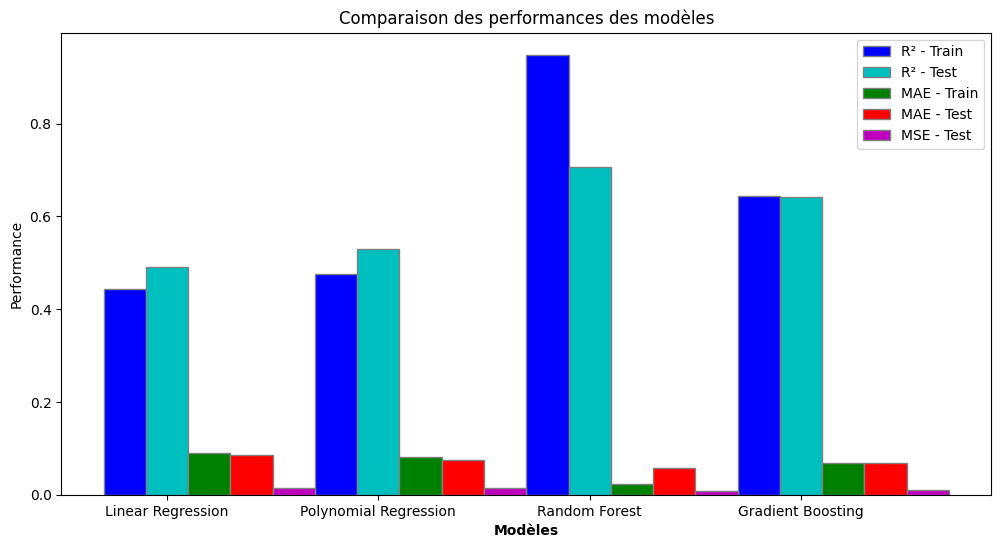

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Données des métriques pour chaque modèle
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Gradient Boosting']
r2_train = [0.44409414553383086, 0.474752803748945, 0.9484208117194345,  0.643944580398649]  
r2_test = [0.49066275267846526, 0.5290957203808564, 0.7059199970697647, 0.6415272740620215]  
mae_train = [0.0897099204500341, 0.08116821288335999, 0.024091768470040728, 0.06847189833088609]  
mae_test = [0.0860266541345645, 0.07566005139305475, 0.05793172237277928, 0.06880508969892617]  
mse_train = [0.015772558105503424, 0.014902688748579633, 0.0014634415839551661, 0.010102258771558736]  
mse_test = [0.014795005707852762, 0.013678621662670924, 0.008542307370604569, 0.010412759039815258]  

# Créer un graphique à barres pour chaque métrique
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()


# III.1 Prédiction du Chiffre d'affaire par date de souscription

# III.1.1 (Random Forest)

In [28]:
import pandas as pd

# Charger le DataFrame à partir du fichier Excel
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Afficher les deux premières colonnes
merged_df


,date_souscription_aff,somme_mca,mcm
0,2022-10-05,497.779994,38.539999
1,2022-10-07,1493.719965,117.360003
2,2022-10-11,2016.779988,158.189999
3,2022-10-12,1018.119990,80.680002
4,2022-10-13,834.780024,65.390002
...,...,...,...
354,2024-01-12,91653.560050,7695.570009
355,2024-01-15,65127.729650,5472.099966
356,2024-01-16,89811.999928,7478.780073
357,2024-01-17,98449.559476,8192.670058


In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Préparer les features d'entrée et la variable cible
X = merged_df[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = merged_df['somme_mca'] 

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores :")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores :
Train: 0.900412462518412
Test: 0.4468923058258697

Mean Absolute Errors :
Train: 0.02788633608447526
Test: 0.06793966062539088

Mean Squared Errors :
Train: 0.0020844670029793923
Test: 0.010046396955391683


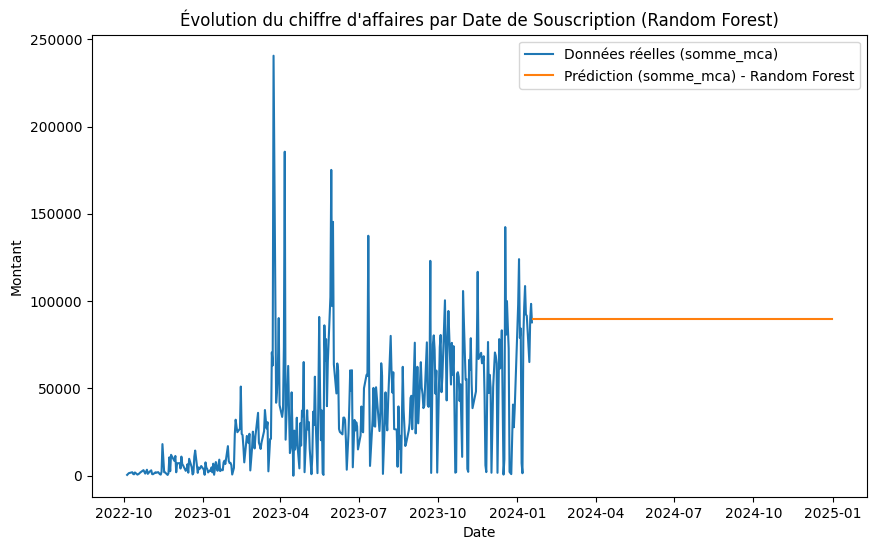

In [54]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Créer un modèle de forêt aléatoire pour 'somme_mca' (Chiffre d'affaires moyen)
model_mca = RandomForestRegressor(random_state=42)

# Séparer les données en données d'entraînement et de test pour 'somme_mca'
X_train_mca = (merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['date_souscription_aff'] - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
X_train_mca = X_train_mca.values.reshape(-1, 1)
y_train_mca = np.log1p(merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['somme_mca'])

# Adapter le modèle aux données d'entraînement pour 'somme_mca'
model_mca.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'somme_mca'
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'somme_mca' avec Random Forest
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date_souscription_aff'], merged_df['somme_mca'], label='Données réelles (somme_mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (somme_mca) - Random Forest')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Évolution du chiffre d\'affaires par Date de Souscription (Random Forest)')
plt.legend()
plt.show()


In [172]:
merged_df

,date_souscription_aff,somme_mca,mcm
0,2022-10-05,497.779994,38.539999
1,2022-10-07,1493.719965,117.360003
2,2022-10-11,2016.779988,158.189999
3,2022-10-12,1018.119990,80.680002
4,2022-10-13,834.780024,65.390002
...,...,...,...
354,2024-01-12,91653.560050,7695.570009
355,2024-01-15,65127.729650,5472.099966
356,2024-01-16,89811.999928,7478.780073
357,2024-01-17,98449.559476,8192.670058


# III.1.2 Régression Linéaire

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Chargement des données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Préparer les features d'entrée et la variable cible
X = merged_df[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = merged_df['somme_mca'] 

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle
model = LinearRegression()

# Appliquer la normalisation sur y_train et y_test
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Entraîner le modèle
model.fit(X_train, y_train_scaled)

LinearRegression()

In [23]:
# Prédictions sur les données d'entraînement et de test
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)


In [24]:
# Afficher les métriques d'évaluation
print("R² scores :")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")

R² scores :
Train: 0.26135929188404994
Test: 0.41500823451914126

Mean Absolute Errors :
Train: 0.07968643203150763
Test: 0.06745071443892472

Mean Squared Errors :
Train: 0.015492337058214815
Test: 0.009614975475273454


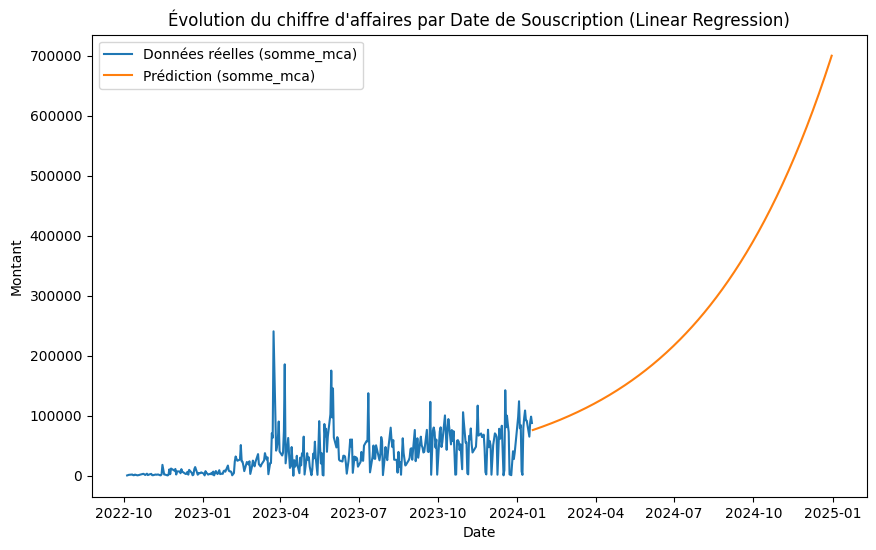

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Créer un modèle de régression linéaire pour 'somme_mca' (Chiffre d'affaires moyen)
model_mca = LinearRegression()

# Séparer les données en données d'entraînement et de test pour 'somme_mca'
X_train_mca = (merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['date_souscription_aff'] - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
X_train_mca = X_train_mca.values.reshape(-1, 1)
y_train_mca = np.log1p(merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['somme_mca'])

# Adapter le modèle aux données d'entraînement pour 'somme_mca'
model_mca.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'somme_mca'
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'somme_mca'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date_souscription_aff'], merged_df['somme_mca'], label='Données réelles (somme_mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (somme_mca)')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Évolution du chiffre d\'affaires par Date de Souscription (Linear Regression)')
plt.legend()
plt.show()


# III.1.2 Régression Polynomiale

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Charger les données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Préparer les caractéristiques et la cible
X = merged_df[['date_souscription_aff']]
y = merged_df['somme_mca']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir les dates en ordinaires
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle de régression polynomiale
degree = 3  # Degré du polynôme
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Entraîner le modèle de régression linéaire sur les caractéristiques polynomiales
model = LinearRegression()
model.fit(X_train_poly, y_train_scaled)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_scaled = model.predict(X_train_poly)
y_test_pred_scaled = model.predict(X_test_poly)

# Calculer les scores R², MAE, et MSE
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores :")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores :
Train: 0.2738090294431973
Test: 0.35295402892235817

Mean Absolute Errors :
Train: 0.08120106152248807
Test: 0.07102289202063793

Mean Squared Errors :
Train: 0.015199905071124942
Test: 0.011752649153686125


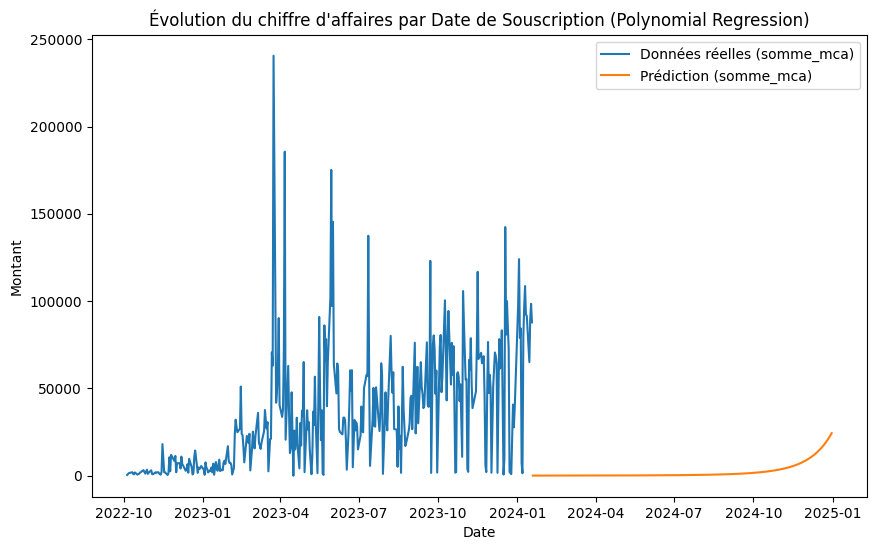

In [35]:
# Créer des caractéristiques polynomiales
degree = 3  # Degré du polynôme
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_mca)

# Adapter le modèle aux données d'entraînement pour 'somme_mca' avec les caractéristiques polynomiales
model_mca.fit(X_train_poly, y_train_mca)

# Prévoir les valeurs futures pour 'somme_mca' avec les caractéristiques polynomiales
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
future_dates_poly = poly_features.transform(future_dates_numeric)
y_pred_mca_log = model_mca.predict(future_dates_poly)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'somme_mca'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date_souscription_aff'], merged_df['somme_mca'], label='Données réelles (somme_mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (somme_mca)')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Évolution du chiffre d\'affaires par Date de Souscription (Polynomial Regression)')
plt.legend()
plt.show()

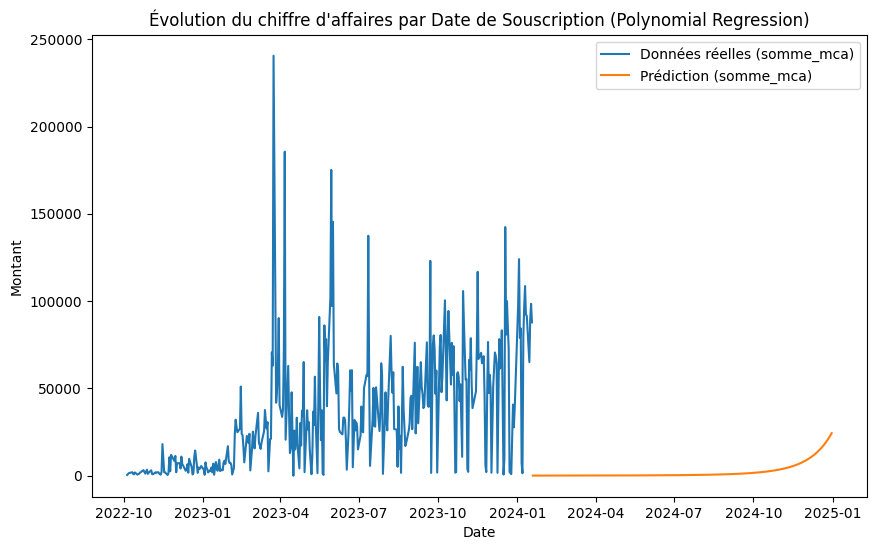

In [36]:
# Inverser la normalisation pour afficher les montants réels
y_pred_mca_actual = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine pour les prédictions

# Tracer les données réelles et les prédictions pour 'somme_mca'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date_souscription_aff'], merged_df['somme_mca'], label='Données réelles (somme_mca)')
plt.plot(future_dates, y_pred_mca_actual, label='Prédiction (somme_mca)')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Évolution du chiffre d\'affaires par Date de Souscription (Polynomial Regression)')
plt.legend()
plt.show()


In [36]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Créer un tableau de dates pour les prédictions futures à partir du 19 janvier 2024
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)



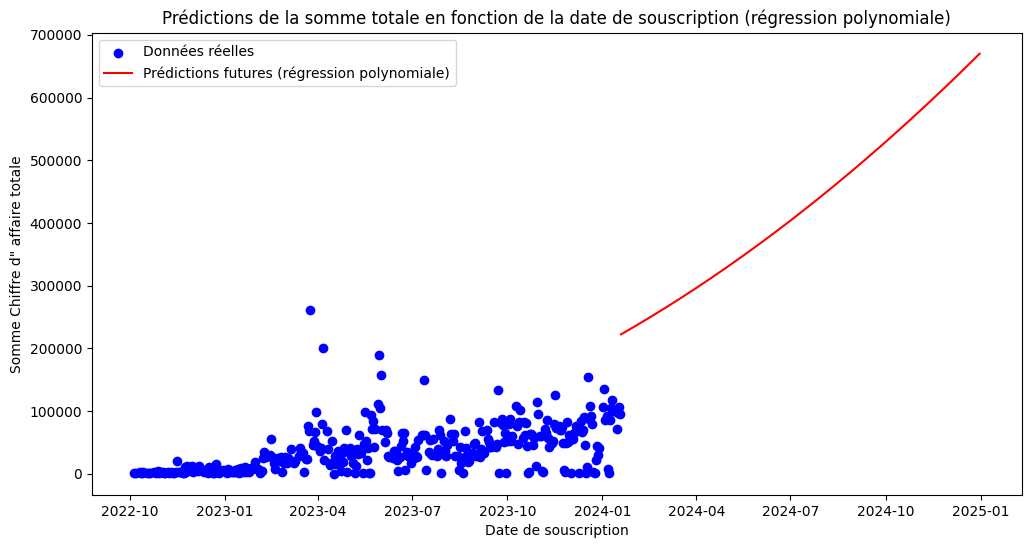

In [37]:
# Prédire les valeurs futures avec le modèle de régression polynomiale
future_dates_numeric_poly = PolynomialFeatures(degree, include_bias=False).fit_transform(future_dates_numeric)
y_pred_future_poly = model.predict(future_dates_numeric_poly)

# Tracer les données réelles et les prédictions futures
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['date_souscription_aff'], merged_df['somme_mca'] + merged_df['mcm'], color='blue', label='Données réelles')
plt.plot(future_dates, y_pred_future_poly, color='red', label='Prédictions futures (régression polynomiale)')
plt.xlabel('Date de souscription')
plt.ylabel('Somme Chiffre d" affaire totale')
plt.title('Prédictions de la somme totale en fonction de la date de souscription (régression polynomiale)')
plt.legend()
plt.show()


# Gradient Boosting

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Préparer les features d'entrée et la variable cible
X = merged_df[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = merged_df['somme_mca'] 

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores :")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores :
Train: 0.8410431603589356
Test: 0.4285249992615463

Mean Absolute Errors :
Train: 0.04076210832711452
Test: 0.06599172850977163

Mean Squared Errors :
Train: 0.003327126019065835
Test: 0.010380012370057154


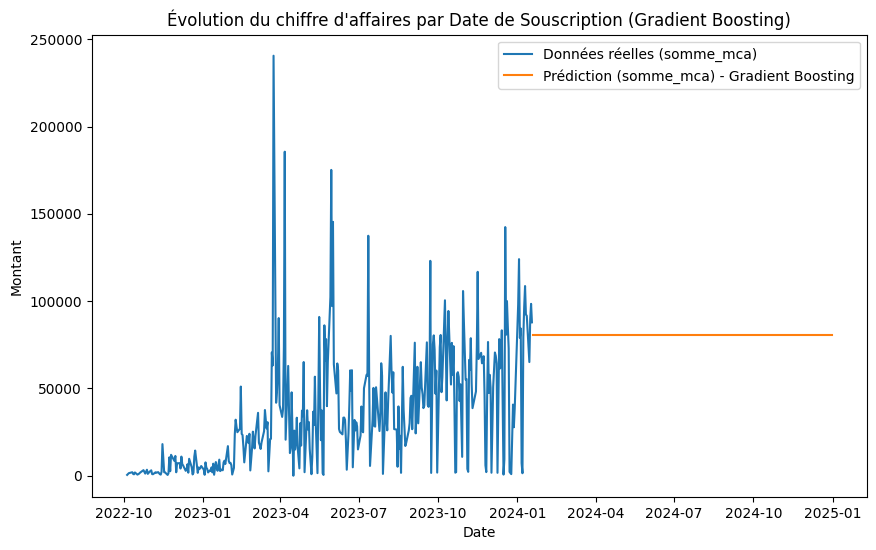

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/merged_df.xls')

# Créer un modèle de Gradient Boosting pour 'somme_mca' (Chiffre d'affaires moyen)
model_mca = GradientBoostingRegressor(random_state=42)

# Séparer les données en données d'entraînement et de test pour 'somme_mca'
X_train_mca = (merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['date_souscription_aff'] - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
X_train_mca = X_train_mca.values.reshape(-1, 1)
y_train_mca = np.log1p(merged_df[merged_df['date_souscription_aff'] < '2024-01-19']['somme_mca'])

# Adapter le modèle aux données d'entraînement pour 'somme_mca'
model_mca.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'somme_mca'
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - merged_df['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'somme_mca' avec Gradient Boosting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date_souscription_aff'], merged_df['somme_mca'], label='Données réelles (somme_mca)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (somme_mca) - Gradient Boosting')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Évolution du chiffre d\'affaires par Date de Souscription (Gradient Boosting)')
plt.legend()
plt.show()


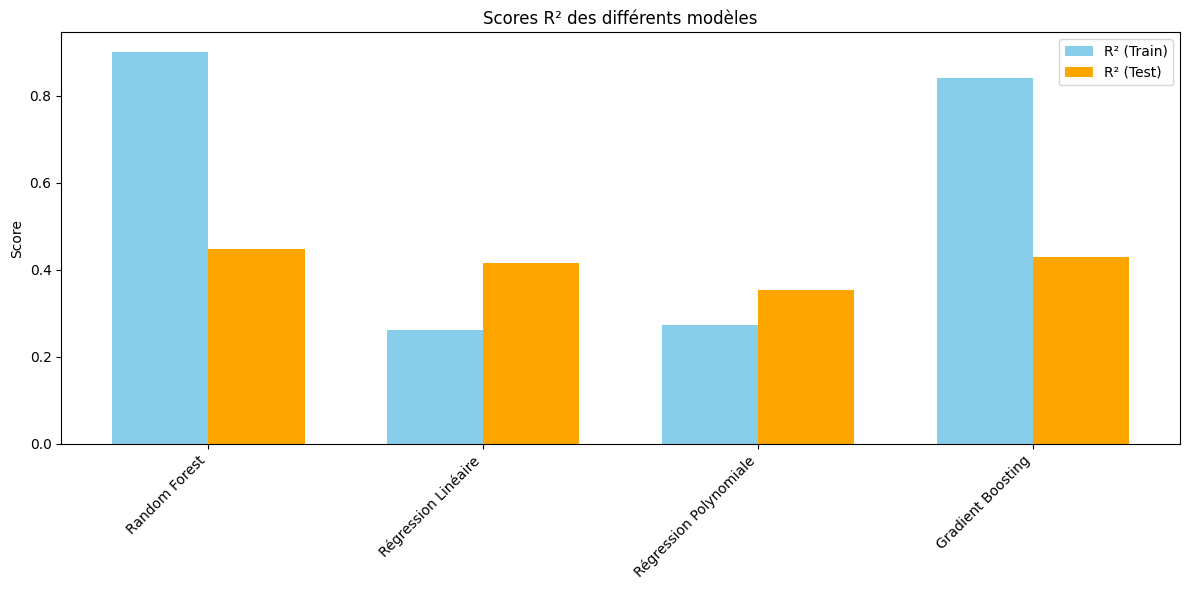

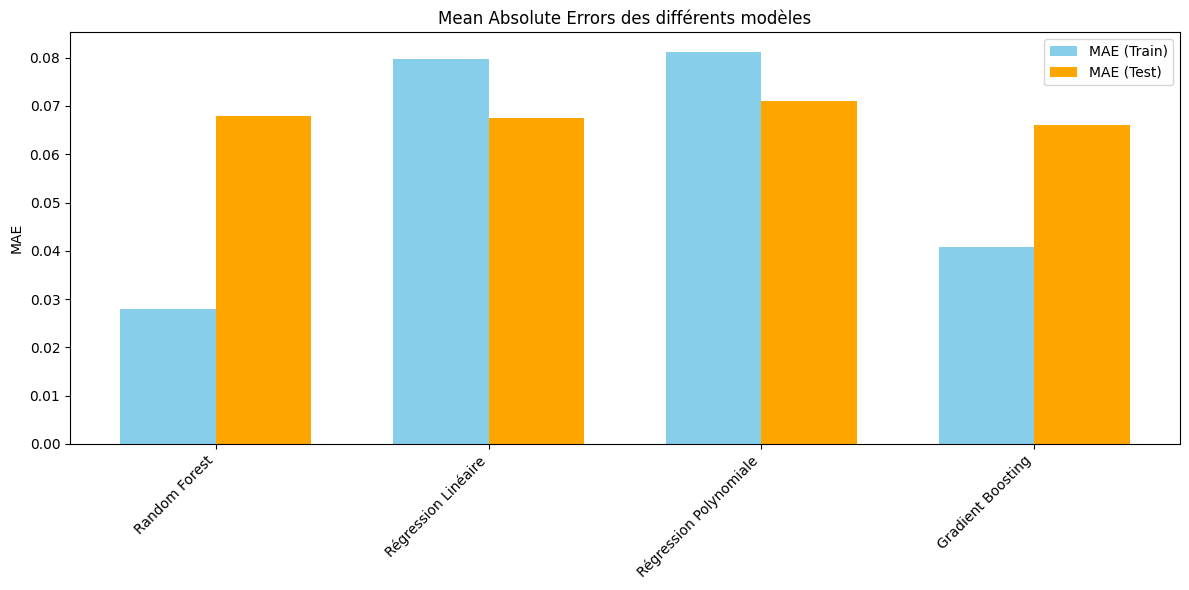

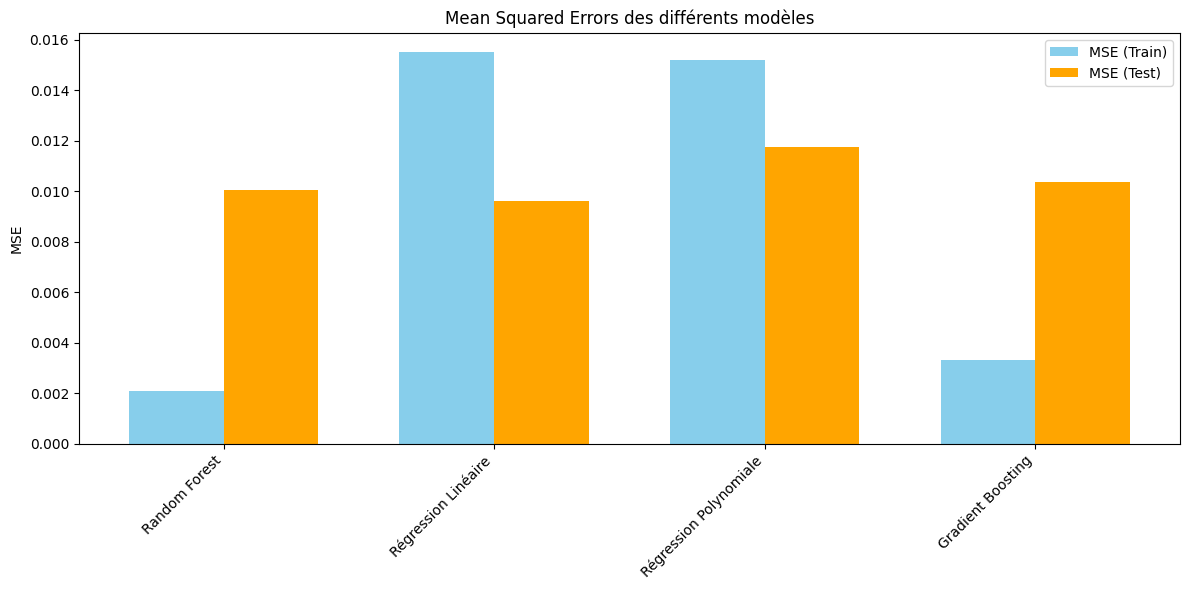

In [27]:
import matplotlib.pyplot as plt
import numpy as np


# Scores R²
r2_scores_train = [0.900412462518412, 0.26135929188404994, 0.2738090294431973,0.8410431603589356]
r2_scores_test = [0.4468923058258697, 0.41500823451914126, 0.35295402892235817,0.4285249992615463]

# MAE
mae_train = [0.02788633608447526, 0.07968643203150763, 0.08120106152248807,0.04076210832711452]
mae_test = [0.06793966062539088, 0.06745071443892472, 0.07102289202063793,0.06599172850977163]

# MSE
mse_train = [0.0020844670029793923, 0.015492337058214815, 0.015199905071124942,0.003327126019065835]
mse_test = [0.010046396955391683, 0.009614975475273454, 0.011752649153686125,0.010380012370057154]

labels = ['Random Forest', 'Régression Linéaire', 'Régression Polynomiale','Gradient Boosting']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les scores R²
rects1 = ax.bar(x - width/2, r2_scores_train, width, label='R² (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, r2_scores_test, width, label='R² (Test)', color='orange')

ax.set_ylabel('Score')
ax.set_title('Scores R² des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MAE
rects1 = ax.bar(x - width/2, mae_train, width, label='MAE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mae_test, width, label='MAE (Test)', color='orange')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MSE
rects1 = ax.bar(x - width/2, mse_train, width, label='MSE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mse_test, width, label='MSE (Test)', color='orange')

ax.set_ylabel('MSE')
ax.set_title('Mean Squared Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()


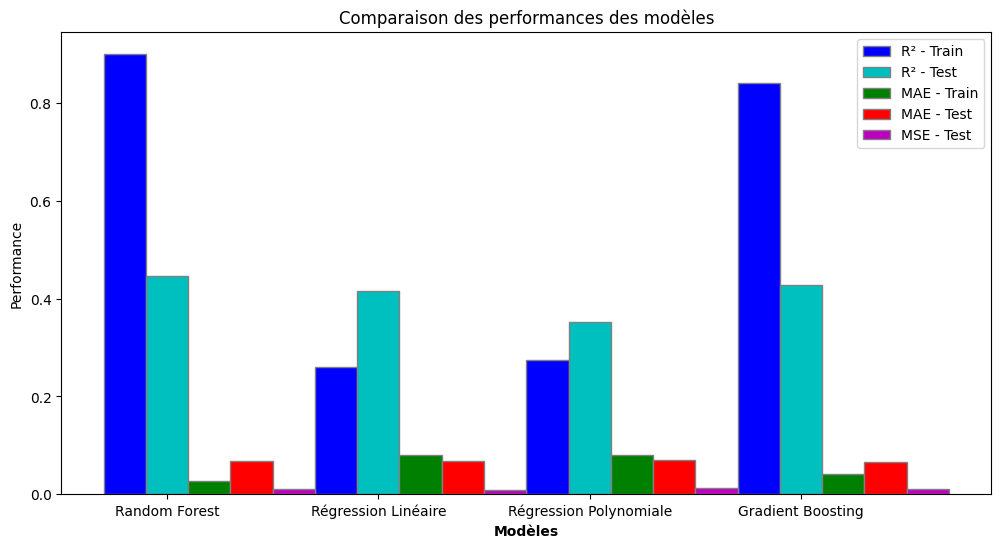

In [5]:
import matplotlib.pyplot as plt
import numpy as np

    
# Données des métriques pour chaque modèle
models = ['Random Forest', 'Régression Linéaire', 'Régression Polynomiale','Gradient Boosting']
# Scores R²
r2_train = [0.900412462518412, 0.26135929188404994, 0.2738090294431973,0.8410431603589356]
r2_test = [0.4468923058258697, 0.41500823451914126, 0.35295402892235817,0.4285249992615463]

# MAE
mae_train = [0.02788633608447526, 0.07968643203150763, 0.08120106152248807,0.04076210832711452]
mae_test = [0.06793966062539088, 0.06745071443892472, 0.07102289202063793,0.06599172850977163]

# MSE
mse_train = [0.0020844670029793923, 0.015492337058214815, 0.015199905071124942,0.003327126019065835]
mse_test = [0.010046396955391683, 0.009614975475273454, 0.011752649153686125,0.010380012370057154]

# Créer un graphique à barres pour chaque métrique
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()


# III.2 Prédiction du Nombre d'affaire par date de souscription

# III.2.1(Random Forest)

In [173]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Chargement des données à partir d'un autre fichier
somme_nb_aff = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')

# Préparer les features d'entrée et la variable cible
X = somme_nb_aff[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = somme_nb_aff['somme_nb_aff']

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores
Train: 0.9188256113758491
Test: 0.41734025293708343

Mean Absolute Errors :
Train: 0.04612169312169312
Test: 0.11712538226299694

Mean Squared Errors :
Train: 0.004688100387420795
Test: 0.035725498917097996


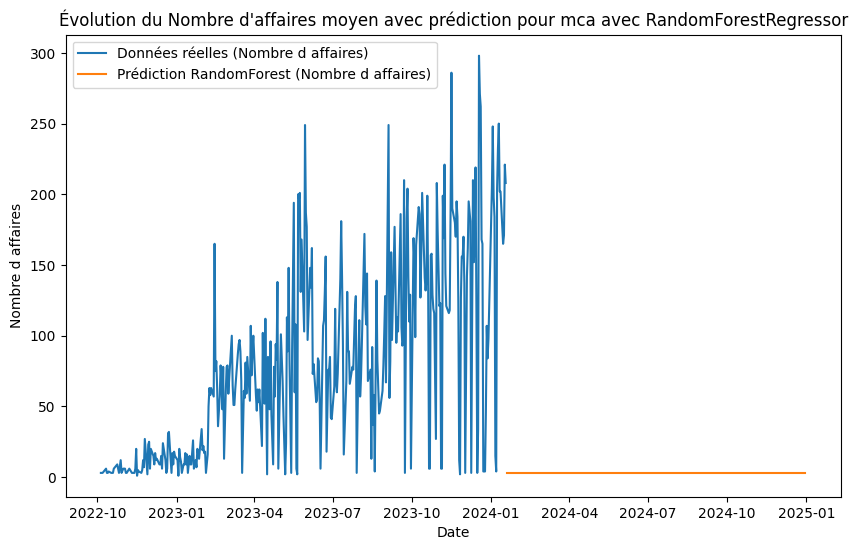

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

# Votre code ici


# Chargement des données à partir d'un autre fichier
somme_nb_aff = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')

# Préparer les features d'entrée et la variable cible
X = somme_nb_aff[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = somme_nb_aff['somme_nb_aff']

# Diviser les données en données d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Prédire les valeurs futures pour 'mca'
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - somme_nb_aff['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_rf = model_rf.predict(future_dates_numeric)

# Tracer les données réelles et les prédictions pour 'mca' avec RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.plot(somme_nb_aff['date_souscription_aff'], somme_nb_aff['somme_nb_aff'], label='Données réelles (Nombre d affaires)')
plt.plot(future_dates, y_pred_rf, label='Prédiction RandomForest (Nombre d affaires)')
plt.xlabel('Date')
plt.ylabel('Nombre d affaires')
plt.title('Évolution du Nombre d\'affaires moyen avec prédiction pour mca avec RandomForestRegressor')
plt.legend()
plt.show()


In [175]:
somme_nb_aff

,date_souscription_aff,somme_nb_aff
0,2022-10-05,3
1,2022-10-07,3
2,2022-10-11,6
3,2022-10-12,3
4,2022-10-13,3
...,...,...
356,2024-01-12,202
357,2024-01-15,165
358,2024-01-16,171
359,2024-01-17,221


# Gradient Boosting

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Chargement des données à partir d'un autre fichier
somme_nb_aff = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')

# Préparer les features d'entrée et la variable cible
X = somme_nb_aff[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = somme_nb_aff['somme_nb_aff']

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle
model_mca_gradient = GradientBoostingRegressor(random_state=42)


# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Utiliser les données normalisées pour l'entraînement du modèle et les prédictions
model_mca_gradient.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")


R² scores
Train: 0.4291226041667511
Test: 0.5006023585842925

Mean Absolute Errors :
Train: 0.1307264283022199
Test: 0.11852681693086418

Mean Squared Errors :
Train: 0.03297013486565847
Test: 0.030620323417796746


# III.2.2 (Regression Lineaire )

In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Chargement des données à partir d'un autre fichier
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')

# Préparer les features d'entrée et la variable cible
X = merged_df[['date_souscription_aff']]  # Utiliser des doubles crochets pour garder X comme un DataFrame
y = merged_df['somme_nb_aff']

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train_scaled)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors :")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors :")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")

R² scores
Train: 0.4291226041667511
Test: 0.5006023585842925

Mean Absolute Errors :
Train: 0.1307264283022199
Test: 0.11852681693086418

Mean Squared Errors :
Train: 0.03297013486565847
Test: 0.030620323417796746


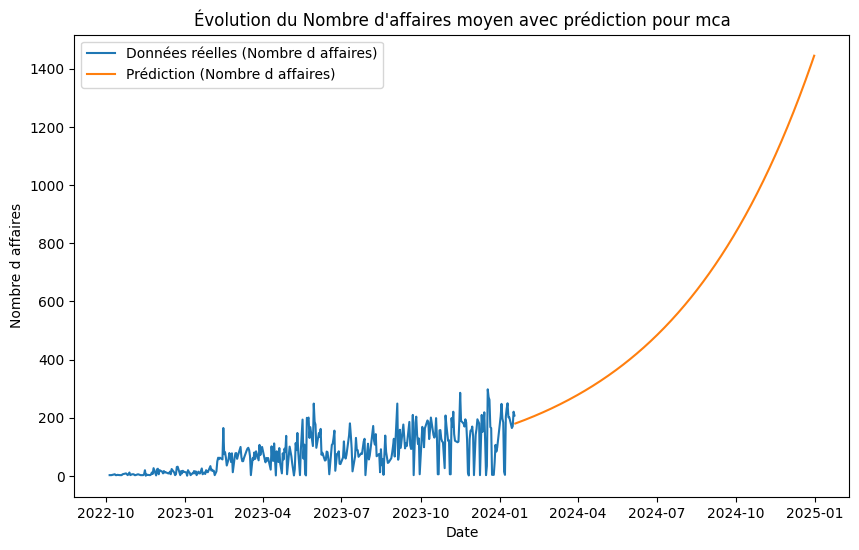

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Chargement des données à partir d'un autre fichier
somme_nb_aff = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')


# Créer un modèle de régression linéaire pour 'mca' seulement
model_mca = LinearRegression()

# Séparer les données en données d'entraînement et de test pour 'mca'
X_train_mca = (somme_nb_aff[somme_nb_aff['date_souscription_aff'] < '2024-01-19']['date_souscription_aff'] - somme_nb_aff['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
X_train_mca = X_train_mca.values.reshape(-1, 1)
y_train_mca = np.log1p(somme_nb_aff[somme_nb_aff['date_souscription_aff'] < '2024-01-19']['somme_nb_aff'])

# Adapter le modèle aux données d'entraînement pour 'mca'
model_mca.fit(X_train_mca, y_train_mca)


# Prévoir les valeurs futures pour 'mca'
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - somme_nb_aff['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log = model_mca.predict(future_dates_numeric)
y_pred_mca = np.expm1(y_pred_mca_log)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'mca'
plt.figure(figsize=(10, 6))
plt.plot(somme_nb_aff['date_souscription_aff'], somme_nb_aff['somme_nb_aff'], label='Données réelles (Nombre d affaires)')
plt.plot(future_dates, y_pred_mca, label='Prédiction (Nombre d affaires)')
plt.xlabel('Date')
plt.ylabel('Nombre d affaires')
plt.title('Évolution du Nombre d\'affaires moyen avec prédiction pour mca')
plt.legend()
plt.show()



# III.2.3 Regression Polynomiale

In [59]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger les données
merged_df = pd.read_excel('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/sum_nb_aff.xls')

# Préparer les features d'entrée et la variable cible
X = merged_df[['date_souscription_aff']]
y = merged_df['somme_nb_aff']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la date en ordinal pour la compatibilité avec le modèle
X_train['date_souscription_aff'] = X_train['date_souscription_aff'].apply(lambda x: x.toordinal())
X_test['date_souscription_aff'] = X_test['date_souscription_aff'].apply(lambda x: x.toordinal())

In [60]:
# Normaliser les valeurs de somme_nb_aff avec MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Créer un pipeline avec les étapes de transformation et de modèle
degree = 2  # Degré du polynôme
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Entraîner le modèle sur les données normalisées
model.fit(X_train, y_train_scaled)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)


In [61]:
# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores avec normalisation")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors avec normalisation:")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors avec normalisation:")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")

R² scores avec normalisation
Train: 0.43262383225482726
Test: 0.49819517158403415

Mean Absolute Errors avec normalisation:
Train: 0.13185308886554972
Test: 0.11942109235135508

Mean Squared Errors avec normalisation:
Train: 0.03276792689052781
Test: 0.030767918917579396


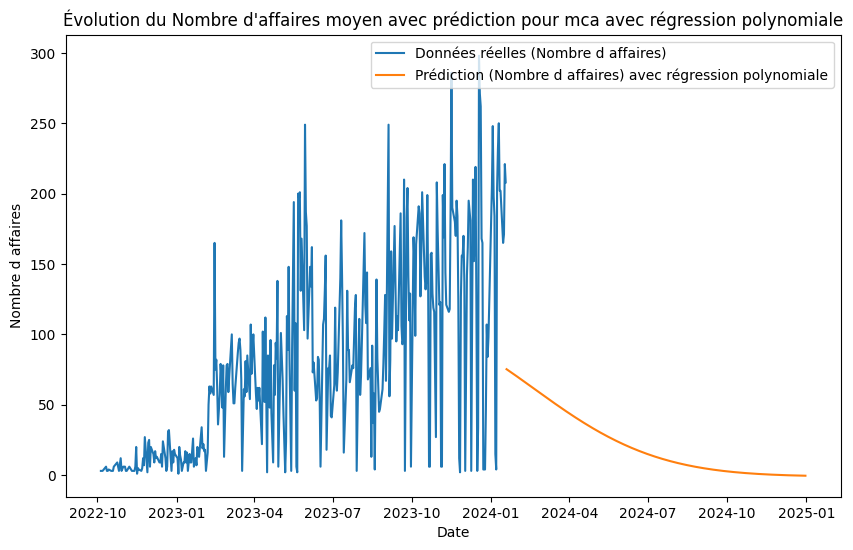

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Créer un modèle de régression polynomiale pour 'mca' seulement
model_mca_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Séparer les données en données d'entraînement et de test pour 'mca'
X_train_mca = (somme_nb_aff[somme_nb_aff['date_souscription_aff'] < '2024-01-19']['date_souscription_aff'] - somme_nb_aff['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
X_train_mca = X_train_mca.values.reshape(-1, 1)
y_train_mca = np.log1p(somme_nb_aff[somme_nb_aff['date_souscription_aff'] < '2024-01-19']['somme_nb_aff'])

# Adapter le modèle aux données d'entraînement pour 'mca'
model_mca_poly.fit(X_train_mca, y_train_mca)

# Prévoir les valeurs futures pour 'mca' avec la régression polynomiale
future_dates = pd.date_range(start='2024-01-19', end='2024-12-31', freq='D')
future_dates_numeric = (future_dates - somme_nb_aff['date_souscription_aff'].min()) / np.timedelta64(1, 'D')
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
y_pred_mca_log_poly = model_mca_poly.predict(future_dates_numeric)
y_pred_mca_poly = np.expm1(y_pred_mca_log_poly)  # Revenir à l'échelle d'origine

# Tracer les données réelles et les prédictions pour 'mca' avec la régression polynomiale
plt.figure(figsize=(10, 6))
plt.plot(somme_nb_aff['date_souscription_aff'], somme_nb_aff['somme_nb_aff'], label='Données réelles (Nombre d affaires)')
plt.plot(future_dates, y_pred_mca_poly, label='Prédiction (Nombre d affaires) avec régression polynomiale')
plt.xlabel('Date')
plt.ylabel('Nombre d affaires')
plt.title('Évolution du Nombre d\'affaires moyen avec prédiction pour mca avec régression polynomiale')
plt.legend()
plt.show()


# III.3 Comparaison entre les modèles

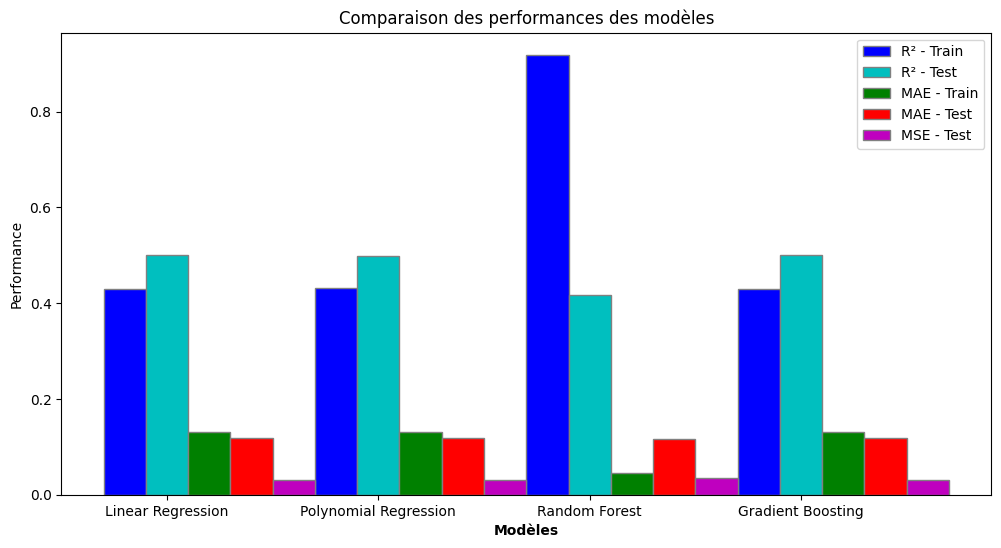

In [33]:
import matplotlib.pyplot as plt
import numpy as np

    
# Données des métriques pour chaque modèle
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest','Gradient Boosting']
r2_train = [0.4291226041667511, 0.4326237925673099, 0.9188256113758491,0.4291226041667511]  
r2_test = [0.5006023585842925, 0.49819364091353013, 0.41734025293708343,0.5006023585842925]  
mae_train = [0.1307264283022199, 0.13185308886554972, 0.04612169312169312,0.1307264283022199]  
mae_test = [0.11852681693086418, 0.11942109235135508, 0.11712538226299694,0.11852681693086418]  
mse_train = [0.03297013486565847, 0.03276792689052781, 0.004688100387420795,0.03297013486565847]  
mse_test = [0.030620323417796746, 0.030767918917579396, 0.035725498917097996,0.030620323417796746]  

# Créer un graphique à barres pour chaque métrique
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()


# IV Prédiction Chiffre d'affaire par date et courtier

## IV.1 Prétraitment de données

In [138]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
data_courtier = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Afficher les premières lignes du DataFrame
data_courtier


,mca,mcm,nom_organisme,date
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00
...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11 00:00:00
2879,"€ 20,71",1.740000,Méléïne,2023-03-06 00:00:00
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05 00:00:00
2881,"€ 17,01",1.500000,As Solutions,2024-01-18 00:00:00


In [142]:
import pandas as pd

# Charger le DataFrame à partir du fichier CSV
data_courtier = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Convertir la colonne 'date' en format de date
data_courtier['date'] = pd.to_datetime(data_courtier['date'])

# Reformater la colonne 'date' pour afficher uniquement la date
data_courtier['date'] = data_courtier['date'].dt.strftime('%Y-%m-%d')

# Afficher les premières lignes du DataFrame avec la colonne 'date' reformatée
data_courtier


,mca,mcm,nom_organisme,date
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29
...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11
2879,"€ 20,71",1.740000,Méléïne,2023-03-06
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05
2881,"€ 17,01",1.500000,As Solutions,2024-01-18


In [143]:
data_courtier = data_courtier.dropna()


In [144]:
data_courtier

,mca,mcm,nom_organisme,date
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29
...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11
2879,"€ 20,71",1.740000,Méléïne,2023-03-06
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05
2881,"€ 17,01",1.500000,As Solutions,2024-01-18


In [171]:
# Afficher le type de chaque colonne dans le DataFrame data_courtier
print(data_courtier.dtypes)


mca               object
mcm              float64
nom_organisme     object
date              object
dtype: object


In [149]:
import pandas as pd

# Charger le DataFrame à partir du fichier CSV
data_courtier = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Convertir la colonne 'date' en format de date
data_courtier['date'] = pd.to_datetime(data_courtier['date'])

# Afficher la date minimale
date_min = data_courtier['date'].min()
print("Date minimale :", date_min)

# Afficher la date maximale
date_max = data_courtier['date'].max()
print("Date maximale :", date_max)


Date minimale : 2022-10-05 00:00:00
Date maximale : 2024-01-19 00:00:00


In [146]:
# Vérifier le nombre de données manquantes par colonne
missing_data = data_courtier.isnull().sum()
print("Données manquantes par colonne :")
print(missing_data)

# Vérifier les statistiques descriptives pour détecter les données aberrantes
# Cette méthode affiche des statistiques telles que la moyenne, l'écart-type, le minimum, le maximum, etc.
# Les valeurs aberrantes peuvent être identifiées en examinant les valeurs min et max, ainsi que les écarts-types élevés par rapport à la moyenne
describe_data = data_courtier.describe()
print("\nStatistiques descriptives du DataFrame :")
print(describe_data)


Données manquantes par colonne :
mca              0
mcm              0
nom_organisme    0
date             0
dtype: int64

Statistiques descriptives du DataFrame :
                mcm
count   2866.000000
mean     373.555621
std      656.135505
min        1.120000
25%       97.120000
50%      200.555000
75%      438.144996
max    18142.609787


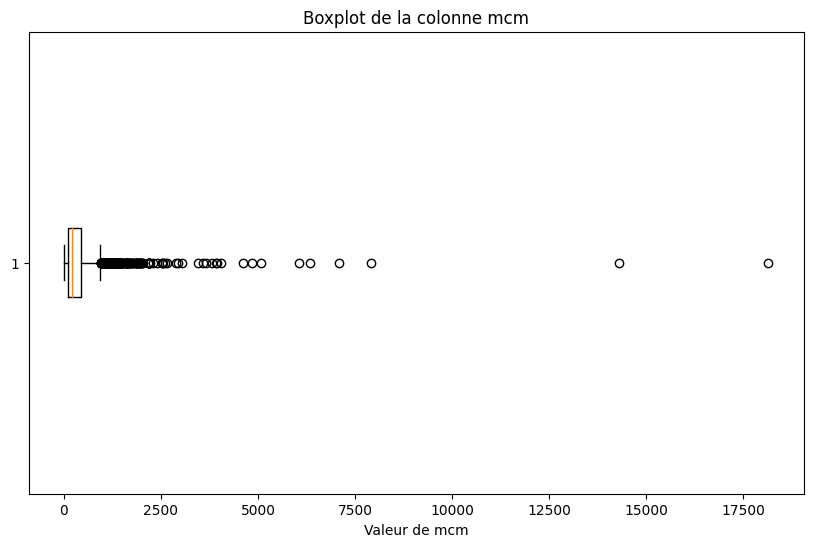

In [147]:
import matplotlib.pyplot as plt

# Créer un boxplot pour la colonne 'mcm'
plt.figure(figsize=(10, 6))
plt.boxplot(data_courtier['mcm'], vert=False)
plt.title('Boxplot de la colonne mcm')
plt.xlabel('Valeur de mcm')
plt.show()


In [148]:
import pandas as pd

# Charger le DataFrame à partir du fichier CSV
data_courtier = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Calculer les quartiles Q1 et Q3
Q1 = data_courtier['mcm'].quantile(0.25)
Q3 = data_courtier['mcm'].quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Calculer les seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = data_courtier[(data_courtier['mcm'] < lower_bound) | (data_courtier['mcm'] > upper_bound)]

# Afficher le nombre de valeurs aberrantes
print("Nombre de valeurs aberrantes dans la colonne 'mcm':", len(outliers))


Nombre de valeurs aberrantes dans la colonne 'mcm': 219


In [255]:
# Supprimer les valeurs aberrantes
data_courtier_cleaned = data_courtier.drop(outliers.index)

# Afficher le nombre de lignes supprimées
print("Nombre de lignes supprimées pour nettoyer les valeurs aberrantes:", len(data_courtier) - len(data_courtier_cleaned))

# Réinitialiser l'index du DataFrame nettoyé
data_courtier_cleaned.reset_index(drop=True, inplace=True)

# Afficher les premières lignes du DataFrame nettoyé
print(data_courtier_cleaned.head())


Nombre de lignes supprimées pour nettoyer les valeurs aberrantes: 219
         mca         mcm                nom_organisme                 date
0  1161644.0  918.939980  Zoom Assurances et Conseils  2023-06-28 00:00:00
1  1151948.0  938.790014                 As Solutions  2023-11-08 00:00:00
2  1148119.0  943.890000                REASSUREZ-MOI  2023-05-22 00:00:00
3  1146949.0  878.959991            CABINET FOX ASSUR  2023-09-27 00:00:00
4  1138225.0  937.179994                NHY Assurance  2023-11-17 00:00:00


In [278]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Charger le fichier CSV dans un DataFrame
data_courtier_cleaned = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Nettoyer la colonne 'mca' en enlevant les symboles de devise et en convertissant en float
data_courtier_cleaned['mca'] = data_courtier_cleaned['mca'].replace({'€': '', ',': ''}, regex=True).astype(float)

# Convertir la colonne 'nom_organisme' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_cleaned[['mca']]
# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())


# Créer et entraîner le modèle
model = RandomForestRegressor(random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Entraîner à nouveau le modèle
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")



R² scores (scaled):
Train: 0.8674658608082497
Test: -0.20017229708176298

Mean Absolute Errors (scaled):
Train: 0.005777286733157675
Test: 0.01331163376347274

Mean Squared Errors (scaled):
Train: 0.00022615509548647508
Test: 0.0004962303109070786


In [266]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Charger le fichier CSV dans un DataFrame
data_courtier_cleaned = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Nettoyer la colonne 'mca' en enlevant les symboles de devise et en convertissant en float
data_courtier_cleaned['mca'] = data_courtier_cleaned['mca'].replace({'€': '', ',': ''}, regex=True).astype(float)

# Convertir la colonne 'nom_organisme' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_cleaned['mca']

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model = RandomForestRegressor(min_samples_leaf=5, random_state=42)

# Créer une instance du scaler MinMax
scaler = MinMaxScaler()

# Appliquer la normalisation sur y_train et y_test
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Entraîner à nouveau le modèle
model.fit(X_train, y_train_scaled)
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

# Calculer les scores R², MAE, et MSE avec les données normalisées
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Afficher les métriques d'évaluation
print("R² scores (scaled):")
print(f"Train: {r2_train_scaled}")
print(f"Test: {r2_test_scaled}")

print("\nMean Absolute Errors (scaled):")
print(f"Train: {mae_train_scaled}")
print(f"Test: {mae_test_scaled}")

print("\nMean Squared Errors (scaled):")
print(f"Train: {mse_train_scaled}")
print(f"Test: {mse_test_scaled}")

R² scores (scaled):
Train: 0.48726824650818656
Test: -0.26368895342556087

Mean Absolute Errors (scaled):
Train: 0.011344605615420491
Test: 0.012801478525922307

Mean Squared Errors (scaled):
Train: 0.0007907220812361171
Test: 0.0005408009908586767


In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Charger le fichier CSV dans un DataFrame
data_courtier_cleaned = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Nettoyer la colonne 'mca' en enlevant les symboles de devise et en convertissant en float
data_courtier_cleaned['mca'] = data_courtier_cleaned['mca'].replace({'€': '', ',': ''}, regex=True).astype(float)

# Convertir la colonne 'nom_organisme' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_cleaned['mca']

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model = RandomForestRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.48726824650818656
Test: -0.26368895342556087

Mean Absolute Errors:
Train: 246961.71796738284
Test: 278676.512560913

Mean Squared Errors:
Train: 374717811339.99866
Test: 256281907985.0046


# Chiffre d'affaire par Date et Courtier

In [76]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
data_courtier = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier.csv')

# Afficher les premières lignes du DataFrame
data_courtier


,mca,mcm,nom_organisme,date
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00
...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11 00:00:00
2879,"€ 20,71",1.740000,Méléïne,2023-03-06 00:00:00
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05 00:00:00
2881,"€ 17,01",1.500000,As Solutions,2024-01-18 00:00:00


In [77]:
# Sauvegarder le DataFrame au format Excel en ignorant les avertissements
import warnings
warnings.filterwarnings("ignore")

data_courtier.to_excel('data_courtier.xls', index=False )

# Créer le lien de téléchargement vers le fichier Excel
from IPython.display import FileLink
FileLink('data_courtier.xls')


C:\Users\dell\data_courtier.xls

In [ ]:
C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier_xls.xls

In [79]:
import pandas as pd

# Chemin vers le fichier Excel
chemin_fichier = "C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier_xls.xls"

# Charger le fichier Excel dans un DataFrame
data_courtier_xls = pd.read_excel(chemin_fichier)

# Afficher le DataFrame
data_courtier_xls


,mca,mcm,nom_organisme,date
0,217711.32,18142.609787,As Solutions,2023-03-24 00:00:00
1,171598.56,14299.879810,As Solutions,2023-04-06 00:00:00
2,95180.57,7899.470115,As Solutions,2023-06-01 00:00:00
3,85053.54,7085.950024,As Solutions,2023-07-12 00:00:00
4,76051.32,6337.609985,As Solutions,2023-05-29 00:00:00
...,...,...,...,...
2878,20.88,1.740000,As Solutions,2023-01-11 00:00:00
2879,20.71,1.740000,Méléïne,2023-03-06 00:00:00
2880,20.44,1.740000,SODEDIF,2023-01-05 00:00:00
2881,17.01,1.500000,As Solutions,2024-01-18 00:00:00


In [81]:
import pandas as pd

# Chemin vers le fichier Excel
chemin_fichier = "C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier_xls.xls"

# Charger le fichier Excel dans un DataFrame
data_courtier_xls = pd.read_excel(chemin_fichier)

# Formater la colonne "date" en jour-mois-année
data_courtier_xls['date'] = pd.to_datetime(data_courtier_xls['date']).dt.strftime('%d-%m-%Y')

# Afficher le DataFrame
data_courtier_xls


,mca,mcm,nom_organisme,date
0,217711.32,18142.609787,As Solutions,24-03-2023
1,171598.56,14299.879810,As Solutions,06-04-2023
2,95180.57,7899.470115,As Solutions,01-06-2023
3,85053.54,7085.950024,As Solutions,12-07-2023
4,76051.32,6337.609985,As Solutions,29-05-2023
...,...,...,...,...
2878,20.88,1.740000,As Solutions,11-01-2023
2879,20.71,1.740000,Méléïne,06-03-2023
2880,20.44,1.740000,SODEDIF,05-01-2023
2881,17.01,1.500000,As Solutions,18-01-2024


In [82]:
# Afficher les types de colonnes du DataFrame
print(data_courtier_xls.dtypes)


mca              float64
mcm              float64
nom_organisme     object
date              object
dtype: object


In [83]:
# Vérifier le nombre de valeurs manquantes dans chaque colonne
nombre_de_valeurs_manquantes = data_courtier_xls.isnull().sum()

# Afficher le nombre de valeurs manquantes
print(nombre_de_valeurs_manquantes)


mca               0
mcm              17
nom_organisme     0
date              0
dtype: int64


In [85]:
# Éliminer les lignes avec des valeurs manquantes dans la colonne "mca"
data_courtier_xls = data_courtier_xls.dropna(subset=['mca'])

# Réinitialiser l'index après avoir supprimé les lignes
data_courtier_xls = data_courtier_xls.reset_index(drop=True)

# Afficher le DataFrame après l'élimination des lignes
data_courtier_xls


,mca,mcm,nom_organisme,date
0,217711.32,18142.609787,As Solutions,24-03-2023
1,171598.56,14299.879810,As Solutions,06-04-2023
2,95180.57,7899.470115,As Solutions,01-06-2023
3,85053.54,7085.950024,As Solutions,12-07-2023
4,76051.32,6337.609985,As Solutions,29-05-2023
...,...,...,...,...
2878,20.88,1.740000,As Solutions,11-01-2023
2879,20.71,1.740000,Méléïne,06-03-2023
2880,20.44,1.740000,SODEDIF,05-01-2023
2881,17.01,1.500000,As Solutions,18-01-2024


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_mca_courtier_randomforest = RandomForestRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model_mca_courtier_randomforest.fit(X_train, y_train)
y_train_pred = model_mca_courtier_randomforest.predict(X_train)
y_test_pred = model_mca_courtier_randomforest.predict(X_test)
# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")



R² scores:
Train: 0.3884070807170973
Test: 0.09852870993359641

Mean Absolute Errors:
Train: 0.012164158756000477
Test: 0.012609695410013465

Mean Squared Errors:
Train: 0.0009431142385182126
Test: 0.0003857601746580976


# Gradient Boosting

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_mca_courtier_GradientBoostingRegressor = GradientBoostingRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model_mca_courtier_GradientBoostingRegressor.fit(X_train, y_train)
y_train_pred = model_mca_courtier_GradientBoostingRegressor.predict(X_train)
y_test_pred = model_mca_courtier_GradientBoostingRegressor.predict(X_test)
# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")



R² scores:
Train: 0.36597133064506615
Test: 0.13178469901644396

Mean Absolute Errors:
Train: 0.013875422233837134
Test: 0.01335162890337007

Mean Squared Errors:
Train: 0.0009777115575479655
Test: 0.000371529176623671


# Regression Linéaire

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_mca_courtier_LinearRegression = LinearRegression()

# Entraîner à nouveau le modèle
model_mca_courtier_LinearRegression.fit(X_train, y_train)
y_train_pred = model_mca_courtier_LinearRegression.predict(X_train)
y_test_pred = model_mca_courtier_LinearRegression.predict(X_test)
# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")



R² scores:
Train: 0.10424907389972726
Test: 0.04046265859738518

Mean Absolute Errors:
Train: 0.015272100655095313
Test: 0.014148769549979972

Mean Squared Errors:
Train: 0.0013813035205861627
Test: 0.00041060796554394255


# Comparaison entre les modèles

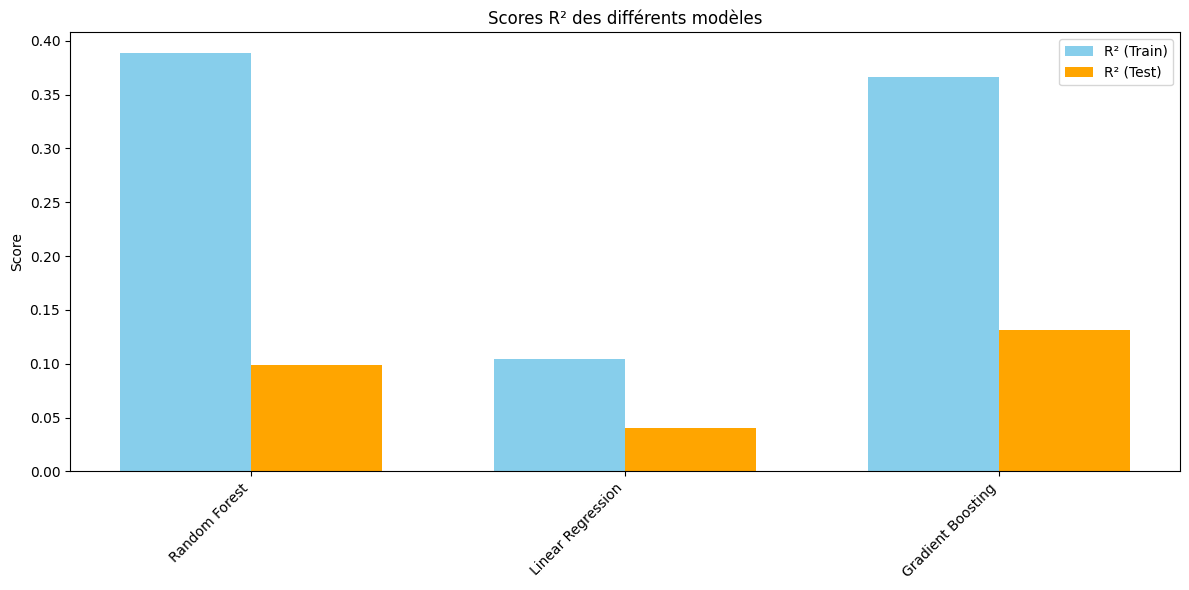

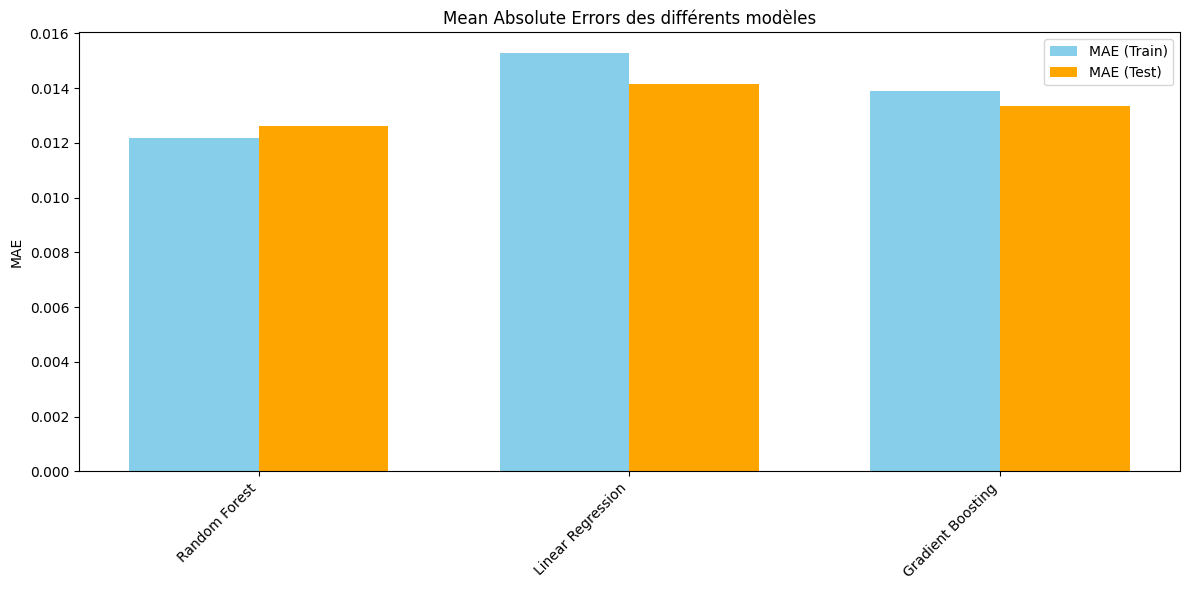

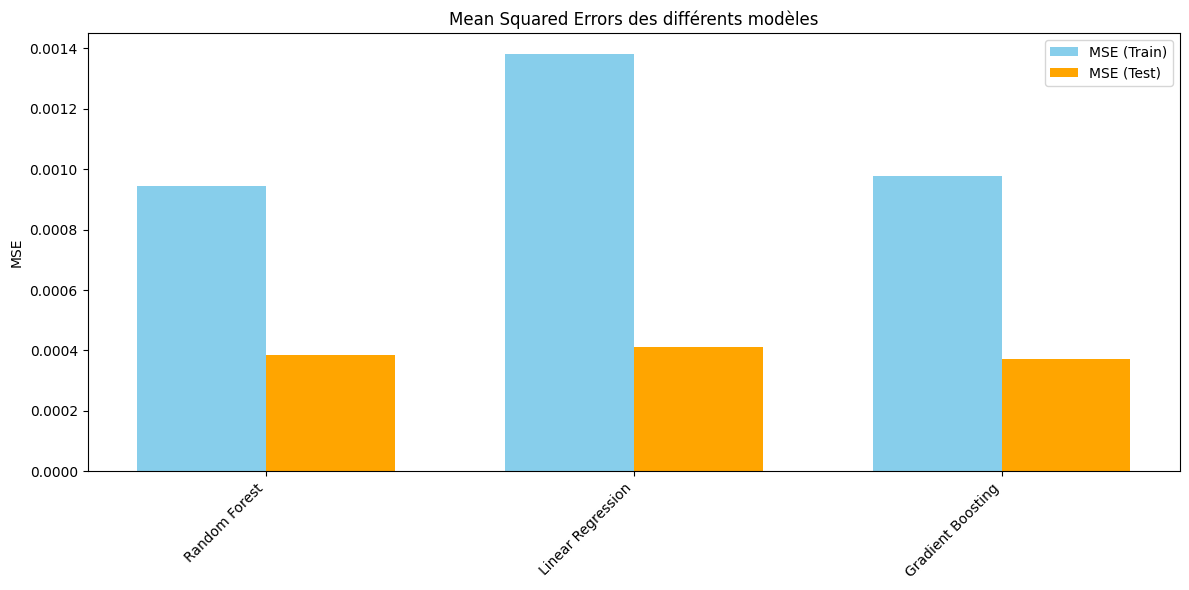

In [107]:
import matplotlib.pyplot as plt
import numpy as np



# Scores R²
r2_scores_train = [0.3884070807170973,0.10424907389972726,0.36597133064506615]
r2_scores_test = [0.09852870993359641,0.04046265859738518,0.13178469901644396]

# MAE
mae_train = [0.012164158756000477,0.015272100655095313,0.013875422233837134]
mae_test = [0.012609695410013465,0.014148769549979972,0.01335162890337007]

# MSE
mse_train = [0.0009431142385182126,0.0013813035205861627,0.0009777115575479655]
mse_test = [0.0003857601746580976,0.00041060796554394255,0.000371529176623671]

labels = ['Random Forest','Linear Regression','Gradient Boosting']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les scores R²
rects1 = ax.bar(x - width/2, r2_scores_train, width, label='R² (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, r2_scores_test, width, label='R² (Test)', color='orange')

ax.set_ylabel('Score')
ax.set_title('Scores R² des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MAE
rects1 = ax.bar(x - width/2, mae_train, width, label='MAE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mae_test, width, label='MAE (Test)', color='orange')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MSE
rects1 = ax.bar(x - width/2, mse_train, width, label='MSE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mse_test, width, label='MSE (Test)', color='orange')

ax.set_ylabel('MSE')
ax.set_title('Mean Squared Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()


# Elimination des données manquantes et aberrantes

In [108]:
# Créer une copie du DataFrame après avoir éliminé les lignes avec des valeurs manquantes dans la colonne "mca"
data_courtier_xls_cleaned = data_courtier_xls.dropna(subset=['mca']).copy()

In [109]:
data_courtier_xls_cleaned

,mca,mcm,nom_organisme,date
0,217711.32,18142.609787,As Solutions,24-03-2023
1,171598.56,14299.879810,As Solutions,06-04-2023
2,95180.57,7899.470115,As Solutions,01-06-2023
3,85053.54,7085.950024,As Solutions,12-07-2023
4,76051.32,6337.609985,As Solutions,29-05-2023
...,...,...,...,...
2878,20.88,1.740000,As Solutions,11-01-2023
2879,20.71,1.740000,Méléïne,06-03-2023
2880,20.44,1.740000,SODEDIF,05-01-2023
2881,17.01,1.500000,As Solutions,18-01-2024


In [110]:
# Calculer les quartiles
Q1 = data_courtier_xls_cleaned.quantile(0.25)
Q3 = data_courtier_xls_cleaned.quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# Définir les seuils pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détecter les valeurs aberrantes
outliers = ((data_courtier_xls_cleaned < lower_bound) | (data_courtier_xls_cleaned > upper_bound)).sum()

# Afficher le nombre de valeurs aberrantes pour chaque colonne
print("Nombre de valeurs aberrantes par colonne :")
print(outliers)


Nombre de valeurs aberrantes par colonne :
date               0
mca              213
mcm              219
nom_organisme      0
dtype: int64


In [111]:
# Filtrer les lignes avec des valeurs aberrantes dans les colonnes 'mca' et 'mcm'
data_courtier_xls_cleaned = data_courtier_xls_cleaned[(data_courtier_xls_cleaned['mca'] >= lower_bound['mca']) & (data_courtier_xls_cleaned['mca'] <= upper_bound['mca'])]
data_courtier_xls_cleaned = data_courtier_xls_cleaned[(data_courtier_xls_cleaned['mcm'] >= lower_bound['mcm']) & (data_courtier_xls_cleaned['mcm'] <= upper_bound['mcm'])]

# Réinitialiser l'index après avoir supprimé les lignes avec des valeurs aberrantes
data_courtier_xls_cleaned = data_courtier_xls_cleaned.reset_index(drop=True)

# Afficher le nombre de valeurs aberrantes après la suppression
print("Nombre de valeurs aberrantes par colonne après suppression :")
print(((data_courtier_xls_cleaned < lower_bound) | (data_courtier_xls_cleaned > upper_bound)).sum())


Nombre de valeurs aberrantes par colonne après suppression :
date             0
mca              0
mcm              0
nom_organisme    0
dtype: int64


In [ ]:
data_courtier_xls_cleaned

# Random Forest 

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls_cleaned

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls_cleaned['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_mca_courtier_cleaned_RandomForestRegressor= RandomForestRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model_mca_courtier_cleaned_RandomForestRegressor.fit(X_train, y_train)
y_train_pred = model_mca_courtier_cleaned_RandomForestRegressor.predict(X_train)
y_test_pred = model_mca_courtier_cleaned_RandomForestRegressor.predict(X_test)
# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")



R² scores:
Train: 0.42990711428056294
Test: 0.2534207481999684

Mean Absolute Errors:
Train: 0.12839336315867275
Test: 0.14567749409939065

Mean Squared Errors:
Train: 0.03046028683067245
Test: 0.03666113433944374


# Gradient Boosting 

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls_cleaned

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls_cleaned['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_courtier_cleaned_GradientBosstingRegressor = GradientBoostingRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model_courtier_cleaned_GradientBosstingRegressor.fit(X_train, y_train)
y_train_pred = model_courtier_cleaned_GradientBosstingRegressor.predict(X_train)
y_test_pred = model_courtier_cleaned_GradientBosstingRegressor.predict(X_test)
# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")



R² scores:
Train: 0.285826171616138
Test: 0.2357361048624137

Mean Absolute Errors:
Train: 0.14672582305131765
Test: 0.15035671227005942

Mean Squared Errors:
Train: 0.038158588195815094
Test: 0.03752954728231628


# Régression Linéaire

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls_cleaned

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls_cleaned['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle de régression linéaire
model_courtier_cleaned_LinearRegression = LinearRegression()
model_courtier_cleaned_LinearRegression.fit(X_train, y_train)
y_train_pred = model_courtier_cleaned_LinearRegression.predict(X_train)
y_test_pred = model_courtier_cleaned_LinearRegression.predict(X_test)

# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.23455942266240404
Test: -2.2340411698965096e+16

Mean Absolute Errors:
Train: 0.1516162044089939
Test: 1986124.192459856

Mean Squared Errors:
Train: 0.04089779073126883
Test: 1097036694389161.2


# Régression Polynomiale

In [119]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_xls_cleaned

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_xls_cleaned[['date', 'nom_organisme']], columns=['nom_organisme'])
y = data_courtier_xls_cleaned['mca']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())


# Créer les caractéristiques polynomiales
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Créer et entraîner le modèle de régression polynomiale
model_courtier_cleaned_PolynomialRegression = LinearRegression()
model_courtier_cleaned_PolynomialRegression.fit(X_train_poly, y_train)
y_train_pred_poly = model_courtier_cleaned_PolynomialRegression.predict(X_train_poly)
y_test_pred_poly = model_courtier_cleaned_PolynomialRegression.predict(X_test_poly)

# Inverser la normalisation pour les prédictions
y_train_pred_poly_inv = scaler.inverse_transform(y_train_pred_poly.reshape(-1, 1)).flatten()
y_test_pred_poly_inv = scaler.inverse_transform(y_test_pred_poly.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

# Afficher les métriques d'évaluation
print("\n\nPour la regression polynomiale :")
print("R² scores:")
print(f"Train: {r2_train_poly}")
print(f"Test: {r2_test_poly}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train_poly}")
print(f"Test: {mae_test_poly}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train_poly}")
print(f"Test: {mse_test_poly}")




Pour la regression polynomiale :
R² scores:
Train: 0.2723210743396949
Test: -653127941993.9088

Mean Absolute Errors:
Train: 0.14710271120000337
Test: 10974.974043234899

Mean Squared Errors:
Train: 0.03888017084843399
Test: 32072162686.799644


# Comparaison entre les modèles

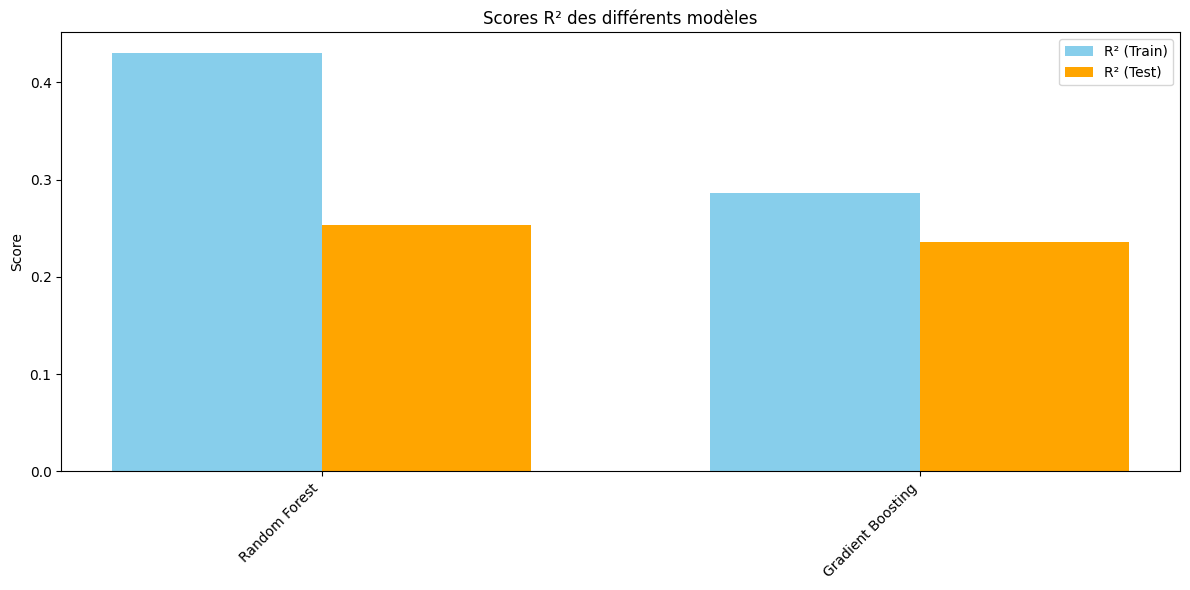

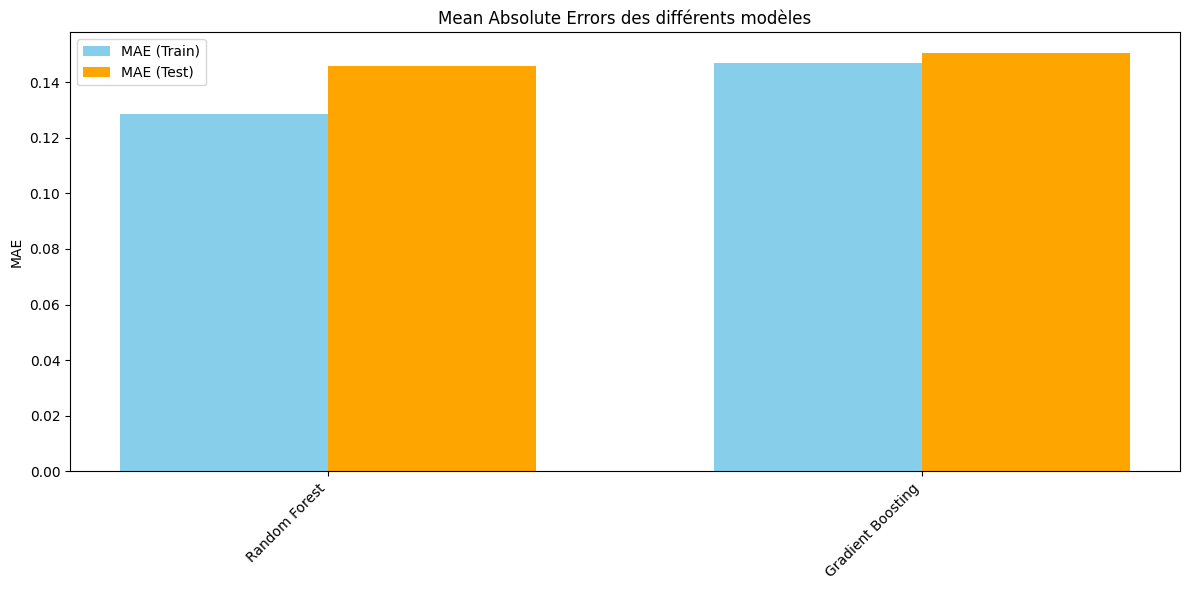

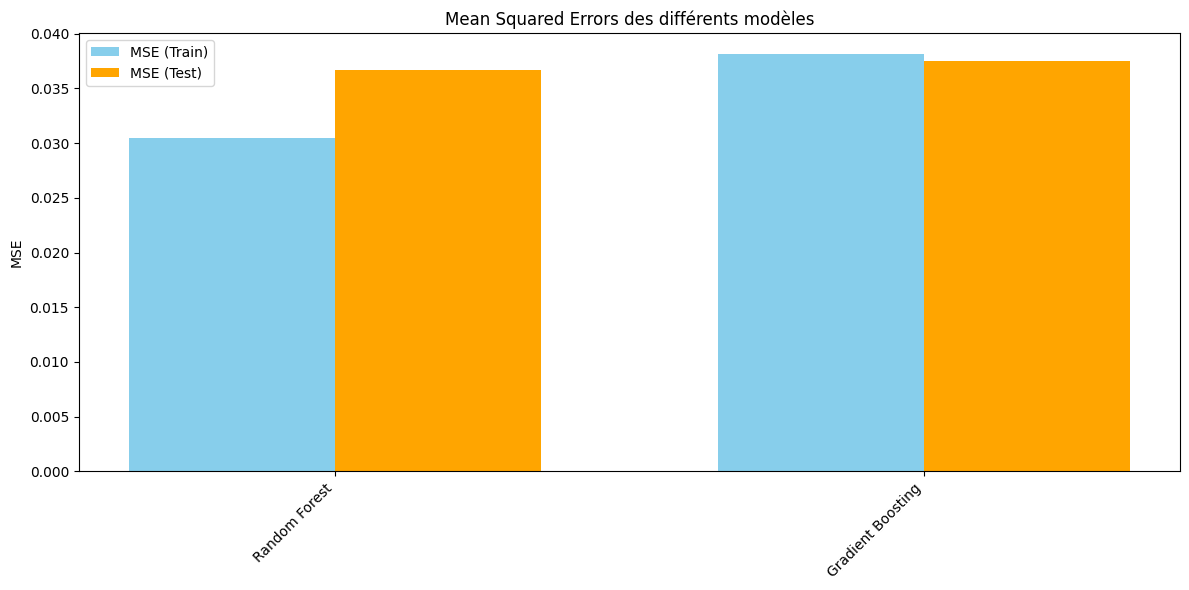

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R²
r2_scores_train = [0.42990711428056294, 0.285826171616138]
r2_scores_test = [0.2534207481999684,0.2357361048624137]

# MAE
mae_train = [0.12839336315867275, 0.14672582305131765]
mae_test = [0.14567749409939065,0.15035671227005942]

# MSE
mse_train = [0.03046028683067245,0.038158588195815094]
mse_test = [0.03666113433944374,0.03752954728231628]

labels = ['Random Forest','Gradient Boosting']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les scores R²
rects1 = ax.bar(x - width/2, r2_scores_train, width, label='R² (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, r2_scores_test, width, label='R² (Test)', color='orange')

ax.set_ylabel('Score')
ax.set_title('Scores R² des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MAE
rects1 = ax.bar(x - width/2, mae_train, width, label='MAE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mae_test, width, label='MAE (Test)', color='orange')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MSE
rects1 = ax.bar(x - width/2, mse_train, width, label='MSE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mse_test, width, label='MSE (Test)', color='orange')

ax.set_ylabel('MSE')
ax.set_title('Mean Squared Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()


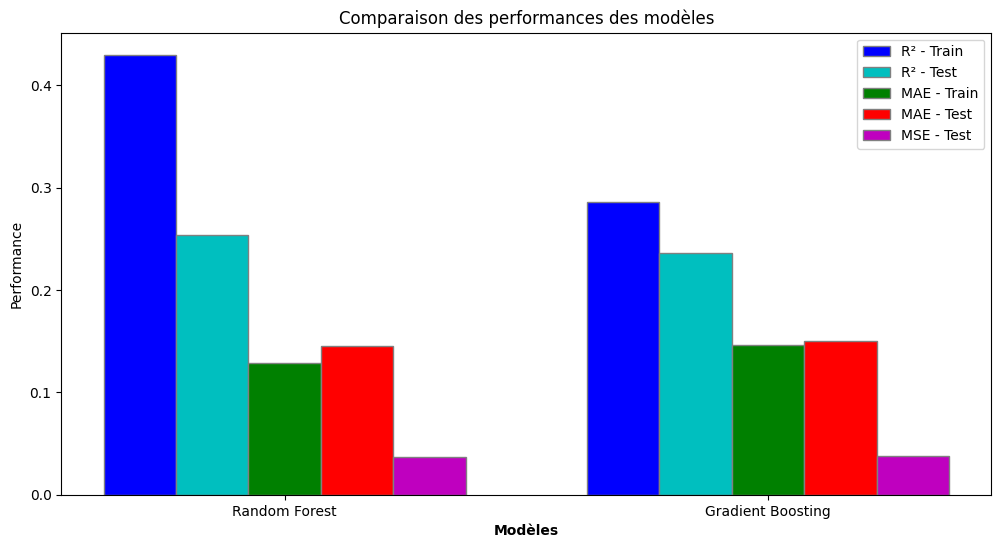

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Données des métriques pour chaque modèle
models = ['Random Forest','Gradient Boosting']

# Scores R²
r2_train = [0.42990711428056294, 0.285826171616138]
r2_test = [0.2534207481999684,0.2357361048624137]

# MAE
mae_train = [0.12839336315867275, 0.14672582305131765]
mae_test = [0.14567749409939065,0.15035671227005942]

# MSE
mse_train = [0.03046028683067245,0.038158588195815094]
mse_test = [0.03666113433944374,0.03752954728231628]

# Vérifier que toutes les données ont la même longueur
assert len(models) == len(r2_train) == len(r2_test) == len(mae_train) == len(mae_test) == len(mse_train) == len(mse_test), "Les données doivent avoir la même longueur"

# Créer un graphique à barres pour chaque métrique
barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()


# V.2 Prediction Nombre d'affaire par date et courtier

## V.2.1 Prétraitment de données

In [58]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
data_courtier_nb_aff = pd.read_csv('C:/Users/dell/OneDrive/Bureau/9raya_esprit/PFE/Fichiers_Analyse_Prédictive/data_courtier_nb_affaires.csv')

# Afficher les premières lignes du DataFrame
data_courtier_nb_aff


,mca,mcm,courtier,date,Nombre_affaire
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00,25
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00,15
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00,44
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00,39
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00,18
...,...,...,...,...,...
2886,NaN,NaN,As Solutions,2023-08-23 00:00:00,3
2887,NaN,NaN,As Solutions,2023-08-24 00:00:00,9
2888,NaN,NaN,ATRIAS PRO,2023-08-24 00:00:00,1
2889,NaN,NaN,NHY Assurance,2023-11-29 00:00:00,1


In [59]:
# Éliminer les valeurs nulles/manquantes
data_courtier_nb_aff_cleaned = data_courtier_nb_aff.dropna()

# Afficher les premières lignes du DataFrame nettoyé
data_courtier_nb_aff_cleaned


,mca,mcm,courtier,date,Nombre_affaire
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00,25
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00,15
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00,44
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00,39
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00,18
...,...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11 00:00:00,2
2879,"€ 20,71",1.740000,Méléïne,2023-03-06 00:00:00,2
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05 00:00:00,2
2881,"€ 17,01",1.500000,As Solutions,2024-01-18 00:00:00,2


In [60]:
# Compter le nombre de données manquantes dans chaque colonne
missing_values_count = data_courtier_nb_aff_cleaned.isnull().sum()

# Afficher le nombre de données manquantes par colonne
print("Nombre de données manquantes par colonne :")
print(missing_values_count)


Nombre de données manquantes par colonne :
mca               0
mcm               0
courtier          0
date              0
Nombre_affaire    0
dtype: int64


In [61]:
# Vérifier les valeurs manquantes dans la colonne 'Nombre_affaire'
missing_values = data_courtier_nb_aff_cleaned['Nombre_affaire'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'Nombre_affaire': {missing_values}")

# Supprimer les lignes avec des valeurs manquantes dans 'Nombre_affaire'
data_courtier_nb_aff_cleaned = data_courtier_nb_aff_cleaned.dropna(subset=['Nombre_affaire'])

# Vérifier à nouveau les dimensions des données
print(f"Dimensions du DataFrame après suppression des valeurs manquantes : {data_courtier_nb_aff_cleaned.shape}")

# Continuer avec le reste du code en utilisant 'data_courtier_cleaned'


Nombre de valeurs manquantes dans 'Nombre_affaire': 0
Dimensions du DataFrame après suppression des valeurs manquantes : (2866, 5)


In [62]:
data_courtier_nb_aff_cleaned

,mca,mcm,courtier,date,Nombre_affaire
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00,25
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00,15
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00,44
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00,39
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00,18
...,...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11 00:00:00,2
2879,"€ 20,71",1.740000,Méléïne,2023-03-06 00:00:00,2
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05 00:00:00,2
2881,"€ 17,01",1.500000,As Solutions,2024-01-18 00:00:00,2


In [63]:
# Supprimer toutes les lignes avec des valeurs manquantes
data_courtier_nb_aff_cleaned_cl = data_courtier_nb_aff_cleaned.dropna()

# Vérifier les dimensions du DataFrame après suppression des valeurs manquantes
print(f"Dimensions du DataFrame après suppression des valeurs manquantes : {data_courtier_nb_aff_cleaned.shape}")


Dimensions du DataFrame après suppression des valeurs manquantes : (2866, 5)


In [64]:
data_courtier_nb_aff_cleaned_cl

,mca,mcm,courtier,date,Nombre_affaire
0,"€ 217711,32",18142.609787,As Solutions,2023-03-24 00:00:00,25
1,"€ 171598,56",14299.879810,As Solutions,2023-04-06 00:00:00,15
2,"€ 95180,57",7899.470115,As Solutions,2023-06-01 00:00:00,44
3,"€ 85053,54",7085.950024,As Solutions,2023-07-12 00:00:00,39
4,"€ 76051,32",6337.609985,As Solutions,2023-05-29 00:00:00,18
...,...,...,...,...,...
2878,"€ 20,88",1.740000,As Solutions,2023-01-11 00:00:00,2
2879,"€ 20,71",1.740000,Méléïne,2023-03-06 00:00:00,2
2880,"€ 20,44",1.740000,SODEDIF,2023-01-05 00:00:00,2
2881,"€ 17,01",1.500000,As Solutions,2024-01-18 00:00:00,2


In [65]:
import pandas as pd

# Convertir la colonne 'date' en type datetime
data_courtier_nb_aff_cleaned_cl['date'] = pd.to_datetime(data_courtier_nb_aff_cleaned_cl['date'])

# Extraire uniquement la date
data_courtier_nb_aff_cleaned_cl['date'] = data_courtier_nb_aff_cleaned_cl['date'].dt.date

# Vérifier le résultat
print(data_courtier_nb_aff_cleaned_cl['date'])


0       2023-03-24
1       2023-04-06
2       2023-06-01
3       2023-07-12
4       2023-05-29
           ...    
2878    2023-01-11
2879    2023-03-06
2880    2023-01-05
2881    2024-01-18
2882    2024-01-16
Name: date, Length: 2866, dtype: object


In [66]:
# Sauvegarder le DataFrame au format Excel en ignorant les avertissements
import warnings
warnings.filterwarnings("ignore")

data_courtier_nb_aff_cleaned_cl.to_excel('data_courtier_nb_aff_cleaned_cl.xls', index=False )

# Créer le lien de téléchargement vers le fichier Excel
from IPython.display import FileLink
FileLink('data_courtier_nb_aff_cleaned_cl.xls')


C:\Users\dell\data_courtier_nb_aff_cleaned_cl.xls

In [67]:
(data_courtier_nb_aff_cleaned_cl.columns)

Index(['mca', 'mcm', 'courtier', 'date', 'Nombre_affaire'], dtype='object')

In [68]:
# Afficher le type de chaque colonne dans le DataFrame data_courtier
print(data_courtier_nb_aff_cleaned.dtypes)

mca                object
mcm               float64
courtier           object
date               object
Nombre_affaire      int64
dtype: object


## V.2.2 Modélisation Random Forest

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_nb_aff_cleaned_cl

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_nb_aff_cleaned_cl[['date', 'courtier']], columns=['courtier'])
y = data_courtier_nb_aff_cleaned_cl['Nombre_affaire']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model = RandomForestRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.6257606491082788
Test: 0.42857836161574603

Mean Absolute Errors:
Train: 0.02610435681674038
Test: 0.03138194148742817

Mean Squared Errors:
Train: 0.0021499214892740756
Test: 0.0028775185399044496


# Régression Linéaire

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_nb_aff_cleaned_cl

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_nb_aff_cleaned_cl[['date', 'courtier']], columns=['courtier'])
y = data_courtier_nb_aff_cleaned_cl['Nombre_affaire']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_nb_aff_linear_regresoin = LinearRegression()

# Entraîner à nouveau le modèle
model_nb_aff_linear_regresoin.fit(X_train, y_train)
y_train_pred = model_nb_aff_linear_regresoin.predict(X_train)
y_test_pred = model_nb_aff_linear_regresoin.predict(X_test)

# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.3729681534110212
Test: -4.0150197591637176e+18

Mean Absolute Errors:
Train: 0.03505904356021309
Test: 8206551.633056042

Mean Squared Errors:
Train: 0.003602157919066315
Test: 2.0218509449072092e+16


# Gradient Boosting

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

# Charger le DataFrame
data_courtier_nb_aff_cleaned_cl

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_nb_aff_cleaned_cl[['date', 'courtier']], columns=['courtier'])
y = data_courtier_nb_aff_cleaned_cl['Nombre_affaire']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer et entraîner le modèle avec régularisation (min_samples_leaf=5)
model_GradientBosstingRegressor = GradientBoostingRegressor(min_samples_leaf=5, random_state=42)

# Entraîner à nouveau le modèle
model_GradientBosstingRegressor.fit(X_train, y_train)
y_train_pred = model_GradientBosstingRegressor.predict(X_train)
y_test_pred = model_GradientBosstingRegressor.predict(X_test)

# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.5638179008682429
Test: 0.44142220980129165

Mean Absolute Errors:
Train: 0.02965140460773492
Test: 0.03187309443885815

Mean Squared Errors:
Train: 0.0025057687437881468
Test: 0.0028128405354415297


# Régression Polynomiale

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Charger le DataFrame
data_courtier_nb_aff_cleaned_cl

# Convertir la colonne 'courtier' en variables catégorielles avec codage one-hot
X = pd.get_dummies(data_courtier_nb_aff_cleaned_cl[['date', 'courtier']], columns=['courtier'])
y = data_courtier_nb_aff_cleaned_cl['Nombre_affaire']

# Appliquer MinMaxScaler à y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.4, random_state=42)

# Convertir la colonne 'date' en un format ordinal
X_train['date'] = pd.to_datetime(X_train['date']).apply(lambda x: x.toordinal())
X_test['date'] = pd.to_datetime(X_test['date']).apply(lambda x: x.toordinal())

# Créer les caractéristiques polynomiales de degré 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prédire sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Inverser la normalisation pour les prédictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculer les scores R², MAE, et MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les métriques d'évaluation
print("R² scores:")
print(f"Train: {r2_train}")
print(f"Test: {r2_test}")

print("\nMean Absolute Errors:")
print(f"Train: {mae_train}")
print(f"Test: {mae_test}")

print("\nMean Squared Errors:")
print(f"Train: {mse_train}")
print(f"Test: {mse_test}")


R² scores:
Train: 0.4180879712168837
Test: -4.5545484793180216e+16

Mean Absolute Errors:
Train: 0.03338985368799333
Test: 1683853.2995579299

Mean Squared Errors:
Train: 0.0033859618506451687
Test: 232317687744833.25


# Comparaison entre les modeles

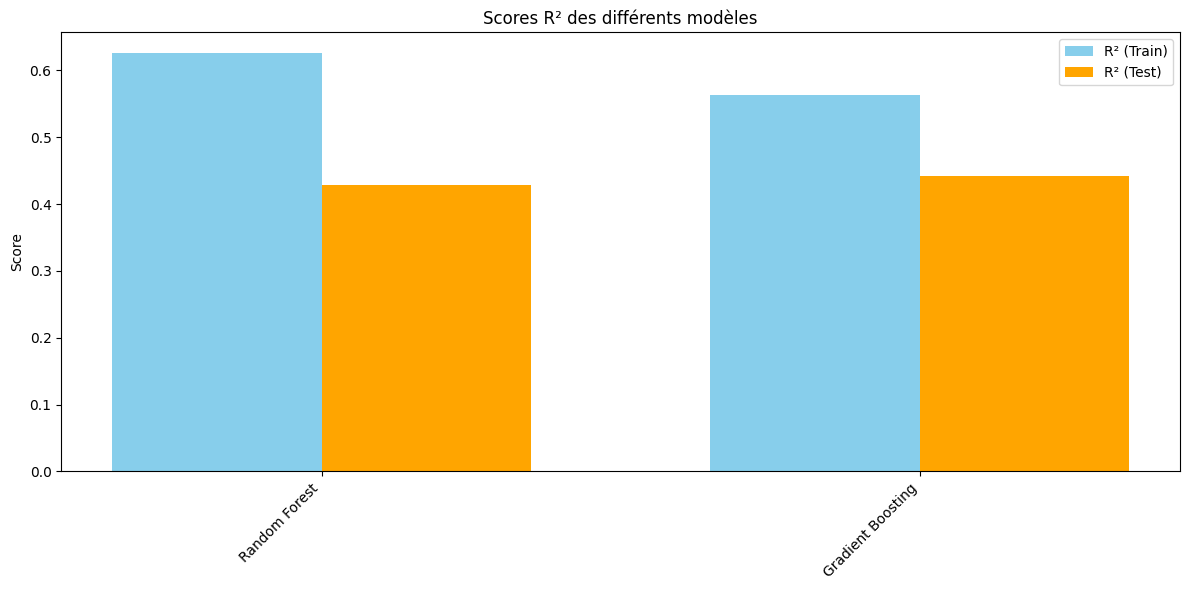

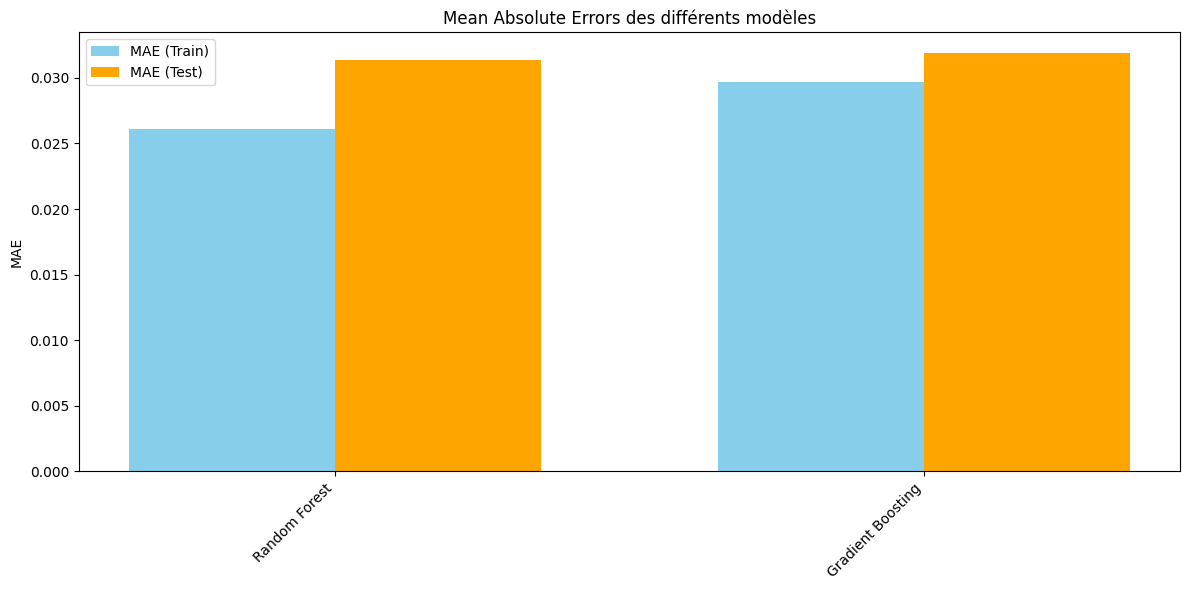

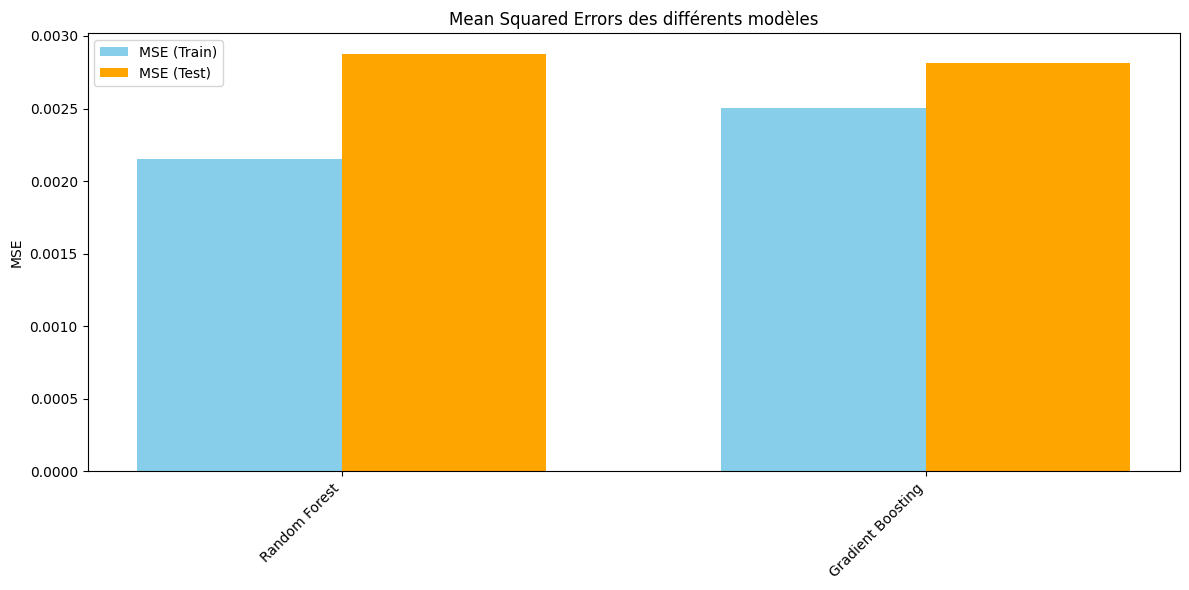

In [75]:
import matplotlib.pyplot as plt
import numpy as np


# Scores R²
r2_scores_train = [0.6257606491082788, 0.5638179008682429]
r2_scores_test = [0.42857836161574603,0.44142220980129165]

# MAE
mae_train = [0.02610435681674038, 0.02965140460773492]
mae_test = [0.03138194148742817,0.03187309443885815]

# MSE
mse_train = [0.0021499214892740756,0.0025057687437881468]
mse_test = [0.0028775185399044496,0.0028128405354415297]

labels = ['Random Forest','Gradient Boosting']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les scores R²
rects1 = ax.bar(x - width/2, r2_scores_train, width, label='R² (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, r2_scores_test, width, label='R² (Test)', color='orange')

ax.set_ylabel('Score')
ax.set_title('Scores R² des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MAE
rects1 = ax.bar(x - width/2, mae_train, width, label='MAE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mae_test, width, label='MAE (Test)', color='orange')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Barres pour les MSE
rects1 = ax.bar(x - width/2, mse_train, width, label='MSE (Train)', color='skyblue')
rects2 = ax.bar(x + width/2, mse_test, width, label='MSE (Test)', color='orange')

ax.set_ylabel('MSE')
ax.set_title('Mean Squared Errors des différents modèles')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()


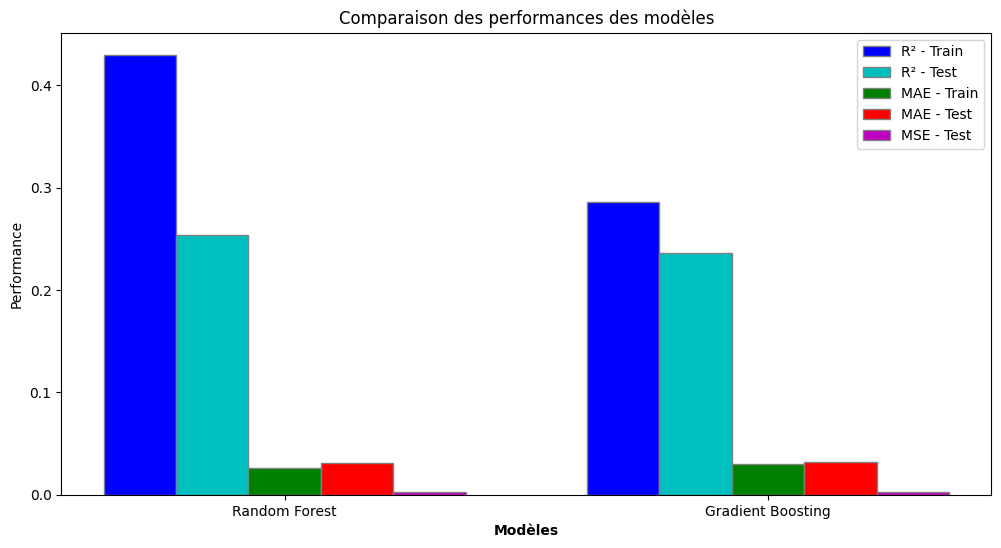

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R²
r2_scores_train = [0.6257606491082788, 0.5638179008682429]
r2_scores_test = [0.42857836161574603,0.44142220980129165]

# MAE
mae_train = [0.02610435681674038, 0.02965140460773492]
mae_test = [0.03138194148742817,0.03187309443885815]

# MSE
mse_train = [0.0021499214892740756,0.0025057687437881468]
mse_test = [0.0028775185399044496,0.0028128405354415297]

labels = ['Random Forest','Gradient Boosting']

# Vérifier que toutes les données ont la même longueur
assert len(models) == len(r2_train) == len(r2_test) == len(mae_train) == len(mae_test) == len(mse_train) == len(mse_test), "Les données doivent avoir la même longueur"

# Créer un graphique à barres pour chaque métrique
barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))

plt.bar(r1, r2_train, color='b', width=barWidth, edgecolor='grey', label='R² - Train')
plt.bar(r2, r2_test, color='c', width=barWidth, edgecolor='grey', label='R² - Test')
plt.bar(r3, mae_train, color='g', width=barWidth, edgecolor='grey', label='MAE - Train')
plt.bar(r4, mae_test, color='r', width=barWidth, edgecolor='grey', label='MAE - Test')
plt.bar(r5, mse_test, color='m', width=barWidth, edgecolor='grey', label='MSE - Test')

# Ajouter des étiquettes, des titres et une légende
plt.xlabel('Modèles', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(models))], models)
plt.ylabel('Performance')
plt.title('Comparaison des performances des modèles')
plt.legend()

# Afficher le graphique
plt.show()
